###  <div align='center'> Project : Lung Cancer Prediction:</div>


#### Problem Statement:

Lung cancer can cause complications, such as: Shortness of breath. People with lung cancer can experience shortness of breath if cancer grows to block the major airways. Lung cancer can also cause fluid to accumulate around the lungs, making it harder for the affected lung to expand fully when you inhale.

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.


 This paper 
envisages to compare twelve potential machine learning algorithms over clinical data with eleven 
symptoms of lung cancer along with two major habits of patients to predict a positive case accurately.

模型比较：逻辑回归、朴素贝叶斯、支持向量机、随机森林、K近邻、XGBoost、以及深度神经网络

评价指标：准确率、精确率、召回率、F1分数

可视化：ROC曲线、混淆矩阵、累计增益图、提升图表、精确率-召回率等

In [324]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 数据预处理

In [325]:
# 数据读取
data=pd.read_csv("D:/OneDrive/桌面/机器学习/论文复现/survey lung cancer1.csv")

In [326]:
data.shape
# or
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL _CONSUMING', 'COUGHING', 'SHORTNESS _OF_BREATH',
       'SWALLOWING _DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

Data Dictionary:

- Total no. of attributes:16

- No .of instances:309

In [327]:
data.keys()

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL _CONSUMING', 'COUGHING', 'SHORTNESS _OF_BREATH',
       'SWALLOWING _DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

### Attribute information:
- Gender: M(male), F(female)
- Age: Age of the patient
- Smoking: YES=2 , NO=1.
- Yellow fingers: YES=2 , NO=1.
- Anxiety: YES=2 , NO=1.
- Peer_pressure: YES=2 , NO=1.
- Chronic Disease: YES=2 , NO=1.
- Fatigue: YES=2 , NO=1. 【劳累】
- Allergy: YES=2 , NO=1. 【过敏】
- Wheezing: YES=2 , NO=1.【哮喘】
- Alcohol: YES=2 , NO=1.
- Coughing: YES=2 , NO=1.
- Shortness of Breath: YES=2 , NO=1.
- Swallowing Difficulty: YES=2 , NO=1.【吞咽困难】
- Chest pain: YES=2 , NO=1.【胸部疼痛】
- Lung Cancer: YES , NO. 【目标特征列】

In [328]:
data.info()
#info() 直接查看基本信息 这个数据集是比较干净的
data.isnull().sum()
# 无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   GENDER                  309 non-null    object
 1   AGE                     309 non-null    int64 
 2   SMOKING                 309 non-null    int64 
 3   YELLOW_FINGERS          309 non-null    int64 
 4   ANXIETY                 309 non-null    int64 
 5   PEER_PRESSURE           309 non-null    int64 
 6   CHRONIC_DISEASE         309 non-null    int64 
 7   FATIGUE                 309 non-null    int64 
 8   ALLERGY                 309 non-null    int64 
 9   WHEEZING                309 non-null    int64 
 10  ALCOHOL _CONSUMING      309 non-null    int64 
 11  COUGHING                309 non-null    int64 
 12  SHORTNESS _OF_BREATH    309 non-null    int64 
 13  SWALLOWING _DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN              309 non-null    int64 
 15  LUNG_C

GENDER                    0
AGE                       0
SMOKING                   0
YELLOW_FINGERS            0
ANXIETY                   0
PEER_PRESSURE             0
CHRONIC_DISEASE           0
FATIGUE                   0
ALLERGY                   0
WHEEZING                  0
ALCOHOL _CONSUMING        0
COUGHING                  0
SHORTNESS _OF_BREATH      0
SWALLOWING _DIFFICULTY    0
CHEST_PAIN                0
LUNG_CANCER               0
dtype: int64

In [329]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL _CONSUMING,COUGHING,SHORTNESS _OF_BREATH,SWALLOWING _DIFFICULTY,CHEST_PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [330]:
data.nunique()
# 都是离散型变量

GENDER                     2
AGE                       39
SMOKING                    2
YELLOW_FINGERS             2
ANXIETY                    2
PEER_PRESSURE              2
CHRONIC_DISEASE            2
FATIGUE                    2
ALLERGY                    2
WHEEZING                   2
ALCOHOL _CONSUMING         2
COUGHING                   2
SHORTNESS _OF_BREATH       2
SWALLOWING _DIFFICULTY     2
CHEST_PAIN                 2
LUNG_CANCER                2
dtype: int64

<AxesSubplot:>

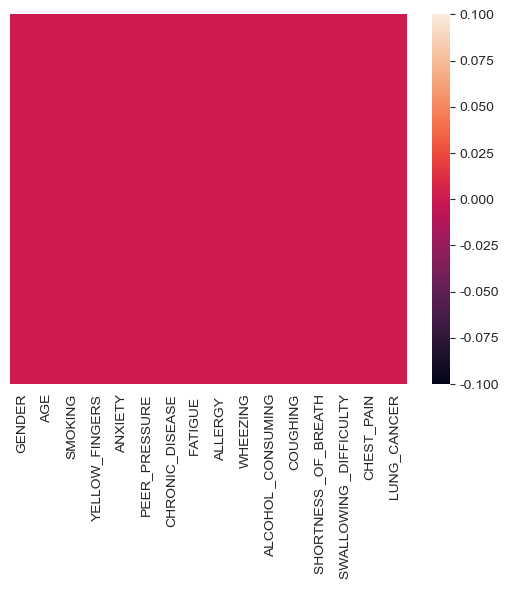

In [331]:
# 使用热力图展现缺失值
data.isnull()
sns.heatmap(data.isnull(),yticklabels=False)
# yticklabels=False 去除 y 轴标签

没有空数据，无需处理空值

In [332]:
'''
发现重复值可以用 duplicated ()。
如果只是df.duplicated()，括号里面什么都不填写，是按照所有列作为依据进行查找的，
每一列的值都必须一致才会被标记为重复值(只标一次)。
'''
# 检测重复数据
data.duplicated().sum()

33

In [333]:
data=data.drop_duplicates()

In [334]:
data.shape
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL _CONSUMING,COUGHING,SHORTNESS _OF_BREATH,SWALLOWING _DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


### 相关性分析

In [335]:
correlation_data=data.drop(['GENDER','LUNG_CANCER'],axis=1)
correlation=correlation_data.corr()
correlation

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL _CONSUMING,COUGHING,SHORTNESS _OF_BREATH,SWALLOWING _DIFFICULTY,CHEST_PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC_DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL _CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


<AxesSubplot:>

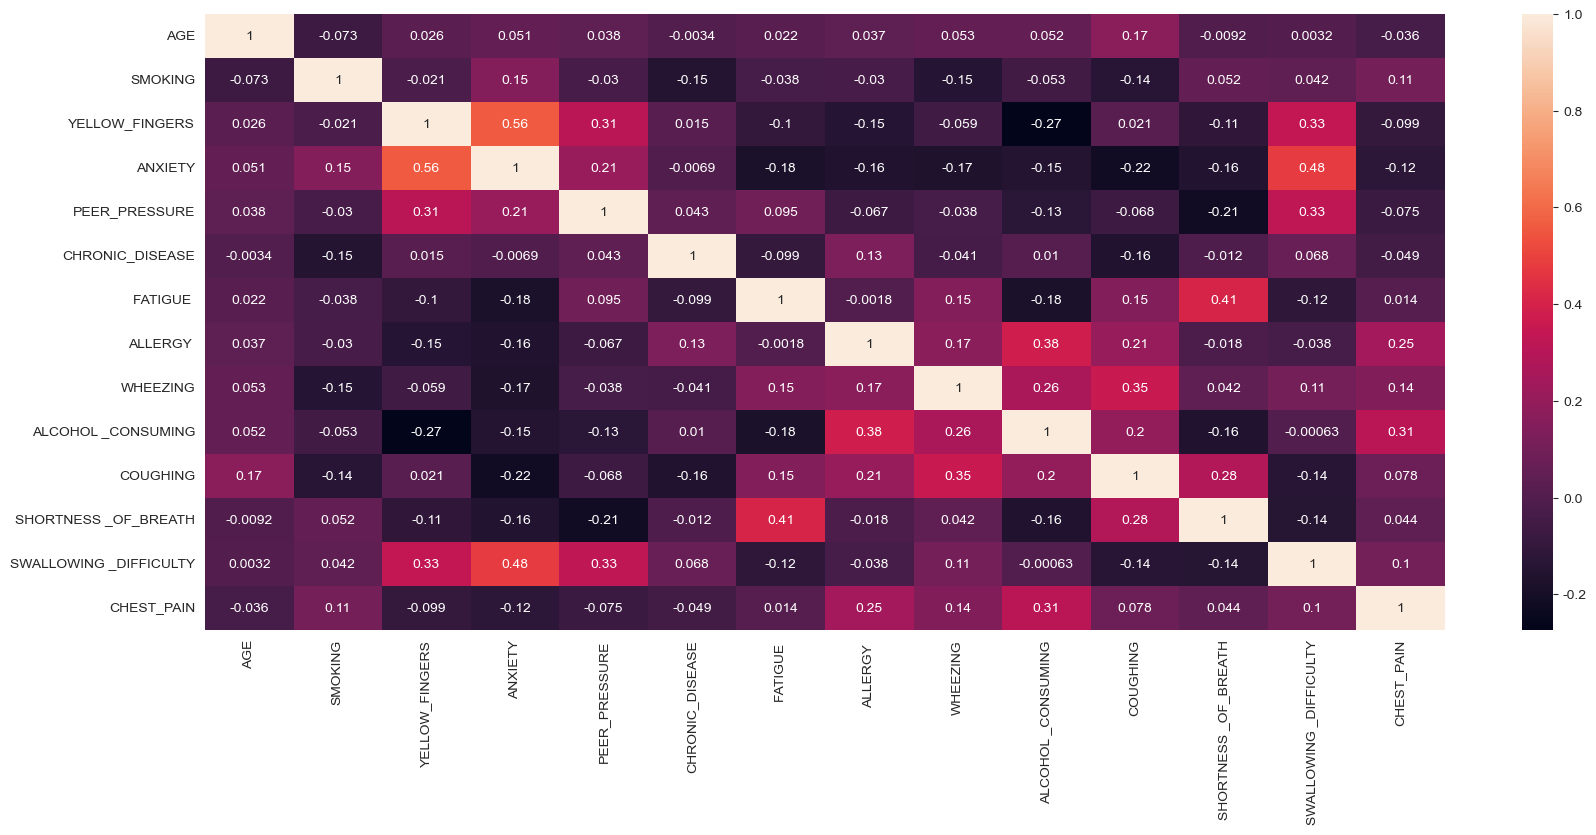

In [336]:
# 相关性分析的热力图
plt.figure(figsize=(20,8))
# annot=True 是否标注数据
sns.heatmap(correlation,annot=True)

### 特征数据展示分析
（字符型数据）

是否患肺癌的人数统计

<AxesSubplot:xlabel='count', ylabel='LUNG_CANCER'>

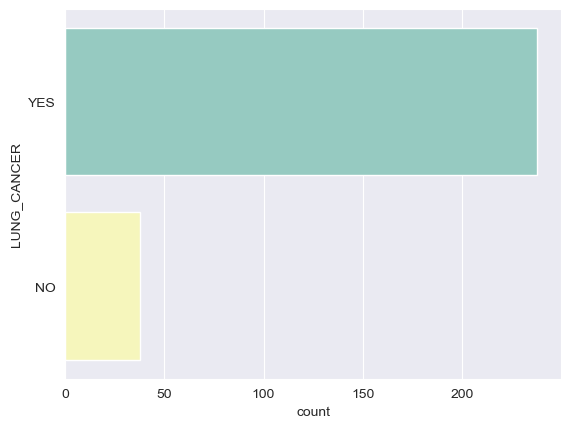

In [337]:
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# palette="Set3" 使用不同的调色板
sns.countplot(data['LUNG_CANCER'],palette="Set3")


肺癌人数统计 饼状图

([<matplotlib.patches.Wedge at 0x2bd8444ab90>,
 [Text(0.8443514261497266, 0.38983415596753823, 'No'),
  Text(-0.8897467025759765, -0.41079289825309406, 'Yes')],
 [Text(0.48118952242941404, 0.22216355125031745, '13.8%'),
  Text(-0.5265847831572106, -0.24312232753754545, '86.2%')])

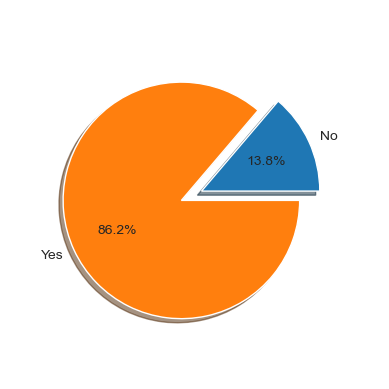

In [338]:
r=data.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
# explode=[0.05, 0.1] 单独出来
plt.pie(r,explode=[0.05, 0.1],labels=['No', 'Yes'],radius=0.8,autopct='%1.1f%%',shadow=True)

<!-- <font color='red' size='17' face='黑体'>年龄可视化分布</font> -->

<mark ><font color='red' size=14 face='黑体'>年龄可视化分布</font></mark>

这一部分使用直方图可视化肺癌阳性病例的年龄分布：

- 分别展示男性和女性患者的年龄分布

- 创建堆叠直方图同时显示男性和女性的年龄分布

Text(0.5, 0, 'Age')

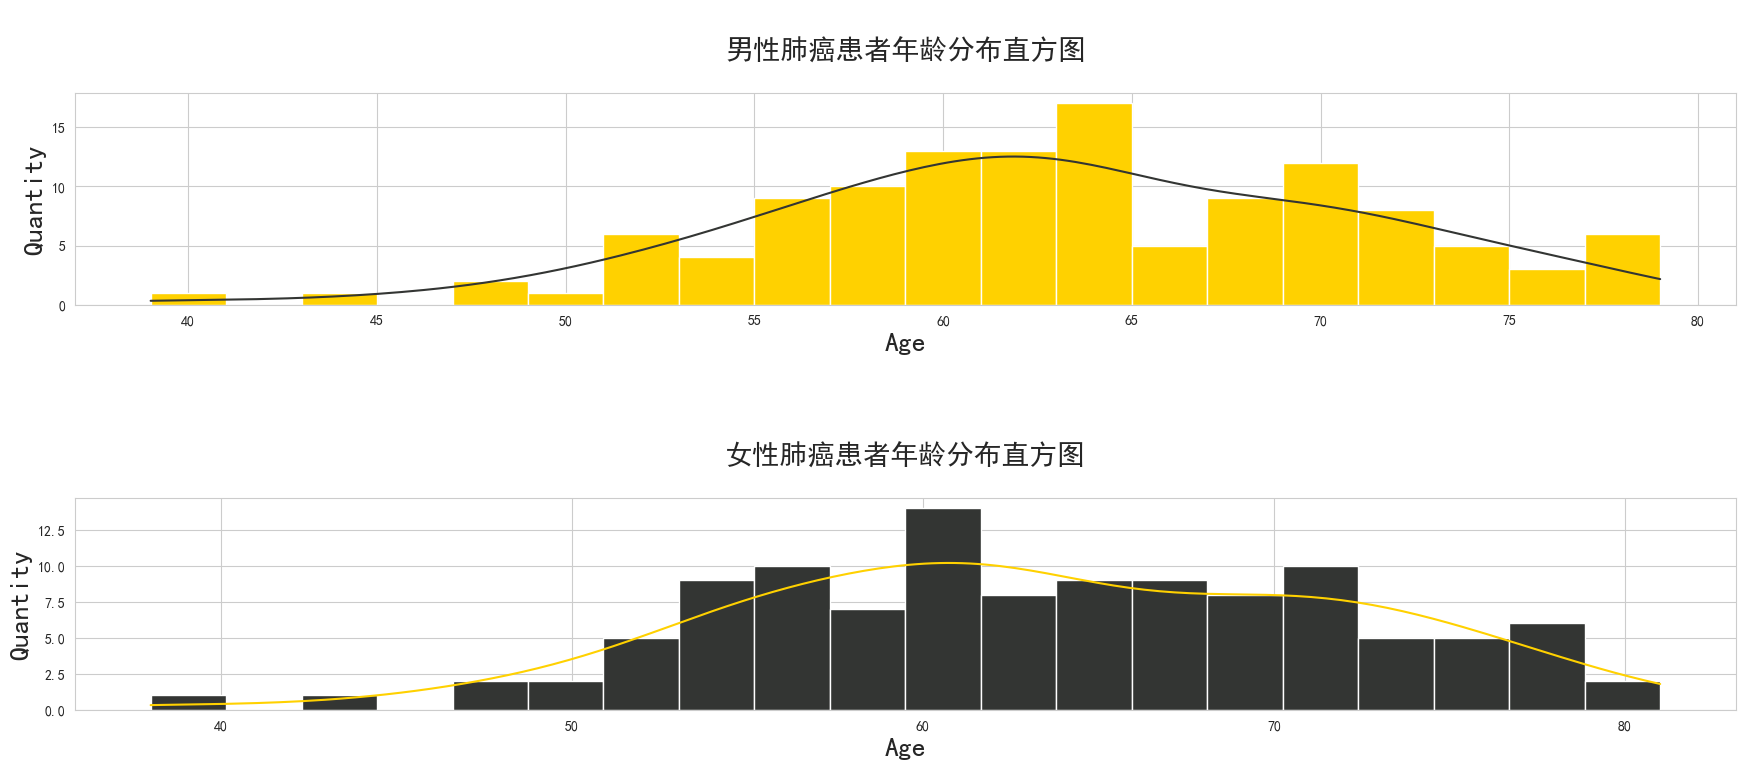

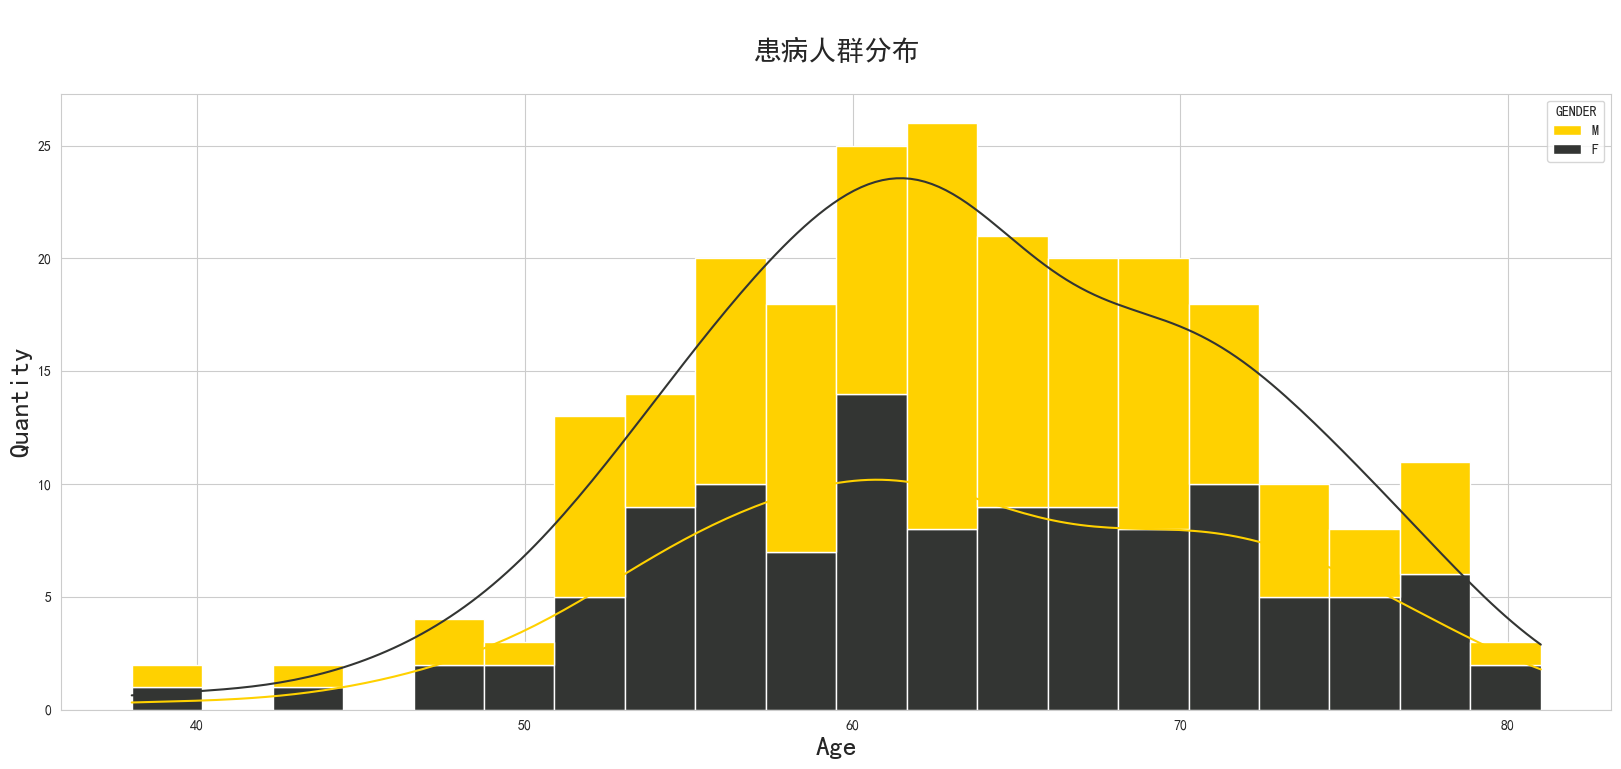

In [339]:
# 定义自定义调色板
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
# 绘图背景格式
sns.set_style('whitegrid')
# 自定义字体
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False



# 创建两个子图，分别显示男性和女性肺癌阳性病例的年龄分布
import matplotlib.pyplot as plt
_,axs=plt.subplots(2,1,figsize=(20,10))

# 所有肺癌阳性病例
data_temp_pos = data[data["LUNG_CANCER"] == "YES"]


# 筛选出 男性 肺癌阳性病例
data_gender_age=data_temp_pos[data_temp_pos['GENDER']=="M"]["AGE"]
# kde=True  绘制趋势曲线
# ax=axs[0] 用于后续进行改进原始样式
# alpha=1 加上kde=True 后 图像会变透明 可以让alpha=1 强制不透明
sns.histplot(data_gender_age,color=palette[11],bins=20,kde=True,ax=axs[0],alpha=1)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\n男性肺癌患者年龄分布直方图\n",fontsize=20)
axs[0].set_xlabel("Age",fontsize=20)
axs[0].set_ylabel("Quantity",fontsize=20)

# padding的距离
plt.tight_layout(pad=10.0)

# 筛选出 女性 肺癌阳性病例
data_temp_pos = data[data["LUNG_CANCER"] == "YES"]
data_gender_age=data_temp_pos[data_temp_pos['GENDER']=="F"]["AGE"]
# kde=True  绘制趋势曲线
# ax=axs[0] 用于后续进行改进原始样式
# alpha=1 加上kde=True 后 图像会变透明 可以让alpha=1 强制不透明
sns.histplot(data_gender_age,color=palette[12],bins=20,kde=True,ax=axs[1],alpha=1)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\n女性肺癌患者年龄分布直方图\n",fontsize=20)
axs[1].set_xlabel("Age",fontsize=20)
axs[1].set_ylabel("Quantity",fontsize=20)



# 创建堆叠的年龄分布直方图，按性别分组
plt.subplots(figsize=(20, 8))
# hue="GENDER" 按照性别划分
# multiple="stack" 堆叠方式绘图
p = sns.histplot(data=data_temp_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,bins=20,alpha=1)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\n患病人群分布\n",fontsize=20)
plt.ylabel("Quantity",fontsize=20)
plt.xlabel("Age",fontsize=20)





<mark ><font color='red' size=14 face='黑体'>性别分布饼图分析</font></mark>

([<matplotlib.patches.Wedge at 0x2bd84f1b970>,
 [Text(-0.08702874156629996, 1.0965518675107833, ''),
  Text(0.08702874156629958, -1.0965518675107833, '')],
 [Text(-0.04747022267252724, 0.5981192004604272, '52.52%'),
  Text(0.04747022267252704, -0.5981192004604272, '47.48%')])

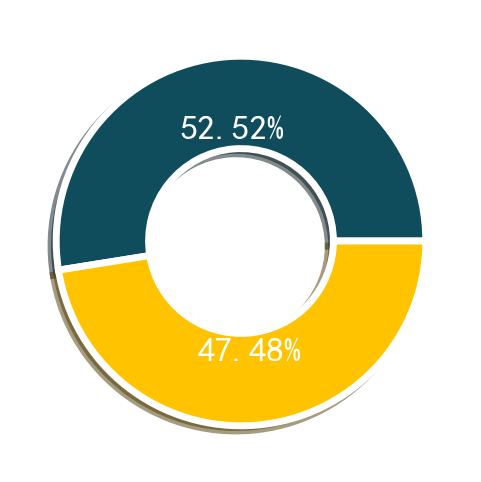

In [340]:
# 创建饼图展示肺癌阳性病例的性别分布
plt.subplots(figsize=(6, 6))
data_temp_pos[data_temp_pos["GENDER"]=="M"]["GENDER"]

plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="M"]["GENDER"]),len(data_temp_pos[data_temp_pos["GENDER"]=="F"]["GENDER"])],
          textprops=dict(size= 25, color= "white"),
            autopct="%.2f%%", # 用于显示 百分比数据
              colors = ["#0f4c5c","#FFC300"],   # 两个分类 不同的颜色
          shadow = True,
         wedgeprops=dict(width = 0.5, edgecolor = "white",  linewidth = 5), # 用于形成环形图
         )

<mark ><font color='red' size=14 face='黑体'>吸烟和饮酒影响分析</font></mark>

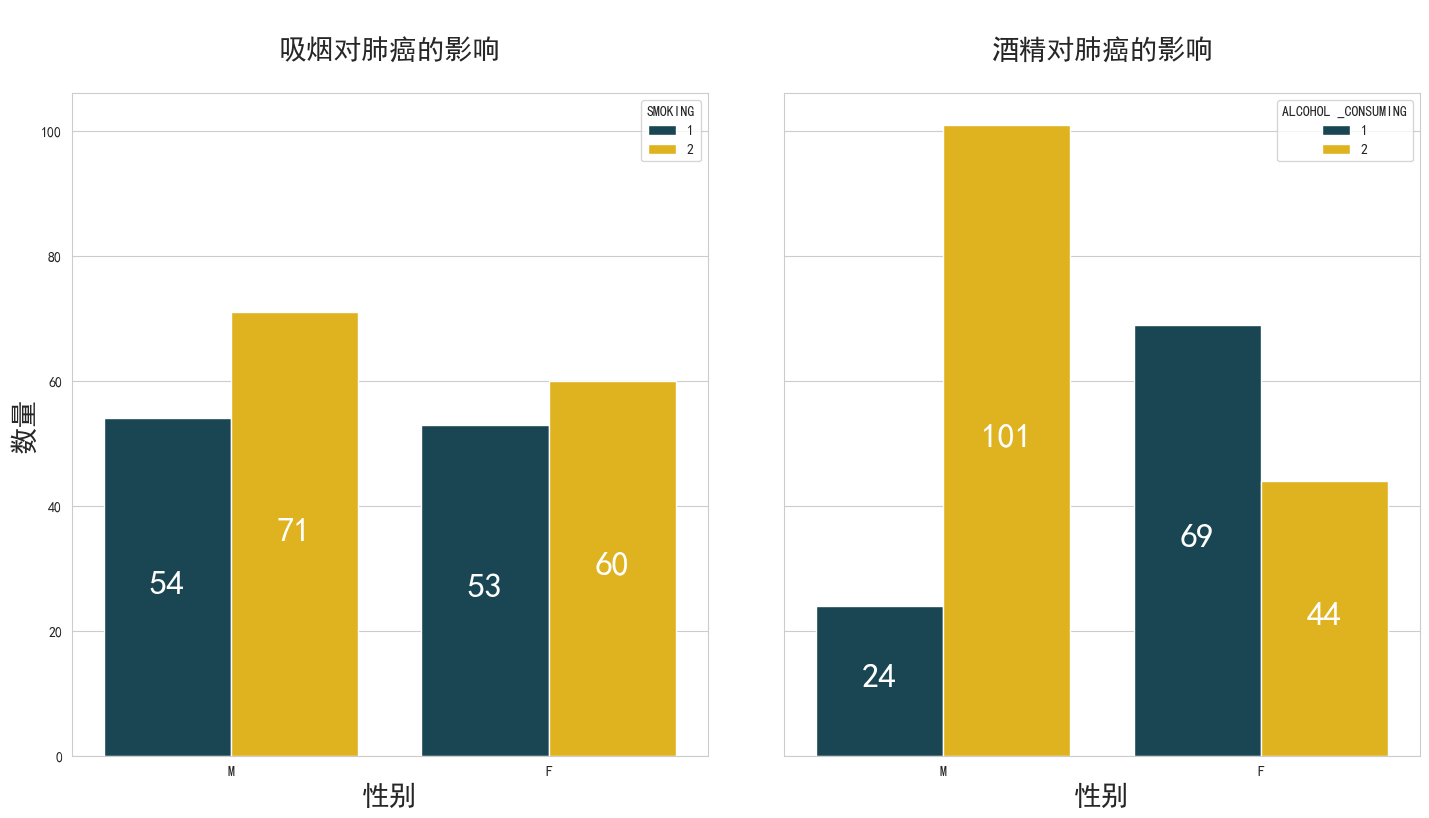

In [341]:
# 创建两个子图，分析吸烟和饮酒对肺癌的影响
_, axs = plt.subplots(1,2,figsize=(15,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0) # 图与图之间的间距

# 分析不同性别的吸烟与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=[1,2],ax=axs[0],palette=["#0f4c5c","#FFC300"])
axs[0].set_title("\n吸烟对肺癌的影响\n",fontsize=20)
axs[0].set_xlabel("性别",fontsize=20)
axs[0].set_ylabel("数量",fontsize=20)
for container in axs[0].containers:
    # 绘出数据值 
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)


# 分析不同性别的饮酒与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL _CONSUMING",hue_order=[1,2],ax=axs[1],palette=["#0f4c5c","#FFC300"])
axs[1].set_title("\n酒精对肺癌的影响\n",fontsize=20)
axs[1].set_xlabel("性别",fontsize=20)
axs[1].set_ylabel("数量",fontsize=20)
for container in axs[1].containers:
    # 绘出数据值 
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)



plt.show()

上图展示了：（数据中全是肺癌人群） 不同性别 吸烟/不吸烟 对肺癌的影响

<mark ><font color='red' size=6 face='黑体'>其他10个不同症状和风险因素与肺癌的关系</font></mark>

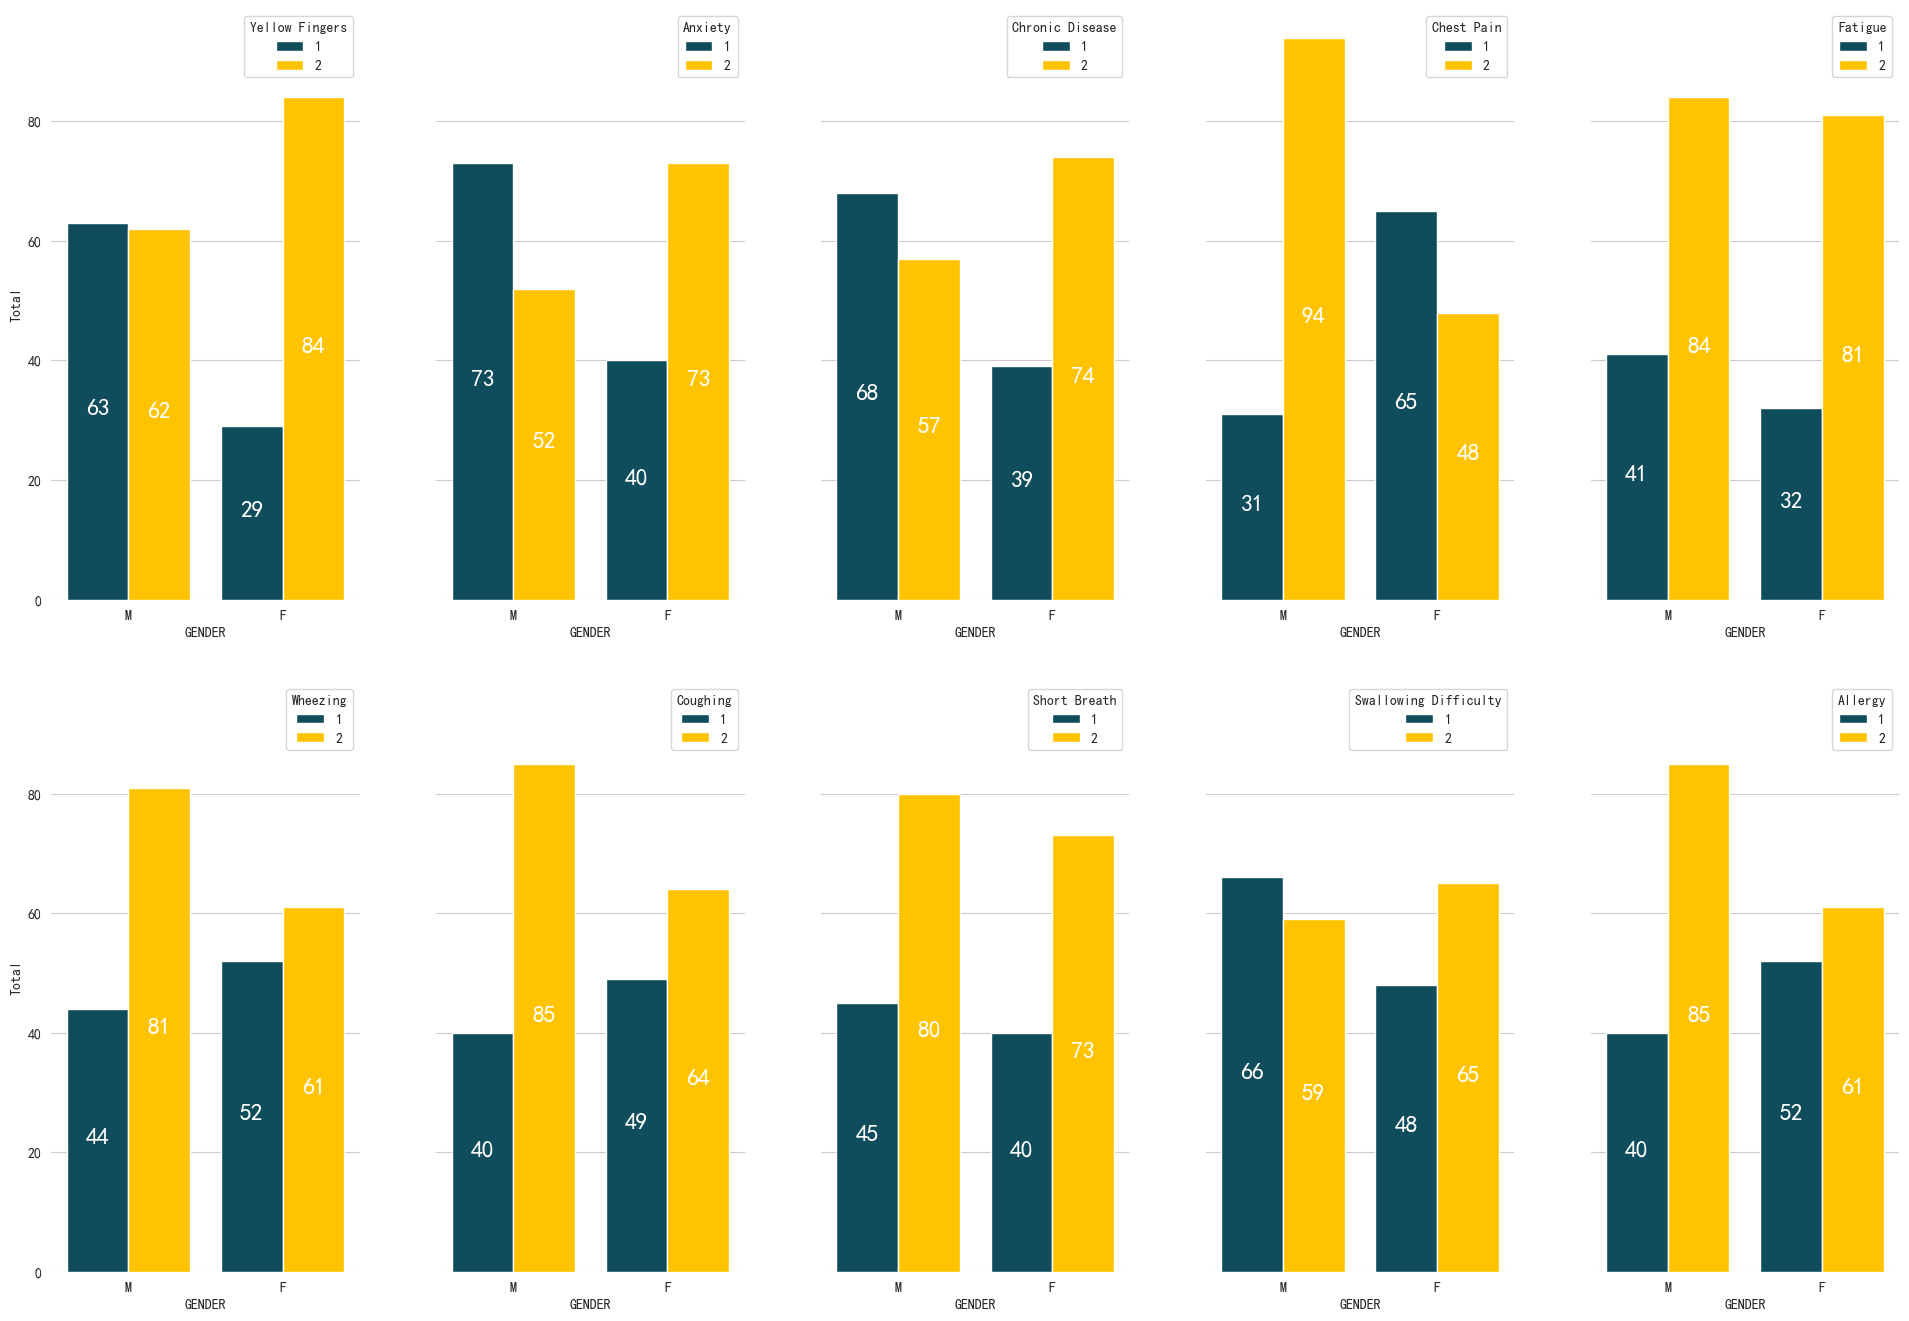

In [342]:
# 创建多个子图，分析10个不同症状和风险因素与肺癌的关系
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

# 分析黄指症与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=[1,2],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析焦虑与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=[1,2],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析慢性疾病与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC_DISEASE",hue_order=[1,2],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析胸痛与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="CHEST_PAIN",hue_order=[1,2],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析疲劳与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=[1,2],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析喘息与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=[1,2],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析咳嗽与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=[1,2],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析呼吸急促与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS _OF_BREATH",hue_order=[1,2],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

# 分析吞咽困难与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING _DIFFICULTY",hue_order=[1,2],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

# 分析过敏与肺癌的关系
sns.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=[1,2],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

sns.despine(left=True, bottom=True)
plt.show()

这一部分使用计数图分析了10个不同症状和风险因素与肺癌的关系：

- 黄指症、焦虑、慢性疾病、胸痛、疲劳

- 喘息、咳嗽、呼吸急促、吞咽困难、过敏

- 每个图表都按性别进行了分组，分析每个因素在不同性别患者中的分布

<AxesSubplot:xlabel='count', ylabel='GENDER'>

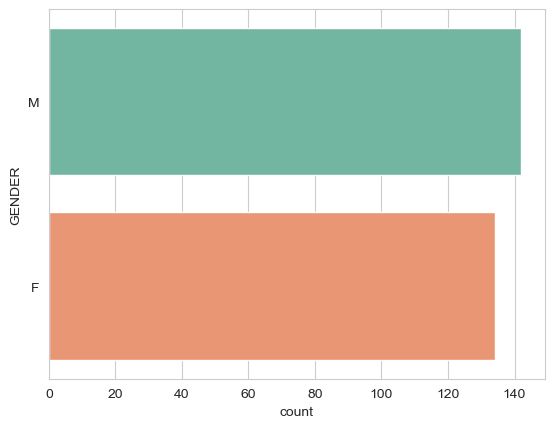

In [343]:
sns.set_style('whitegrid')
sns.countplot(data['GENDER'],palette="Set2")

### 特征数据展示分析
（数值型数据）

In [344]:
num_col=data.select_dtypes(include=np.number).columns.to_list()
num_col

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC_DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL _CONSUMING',
 'COUGHING',
 'SHORTNESS _OF_BREATH',
 'SWALLOWING _DIFFICULTY',
 'CHEST_PAIN']

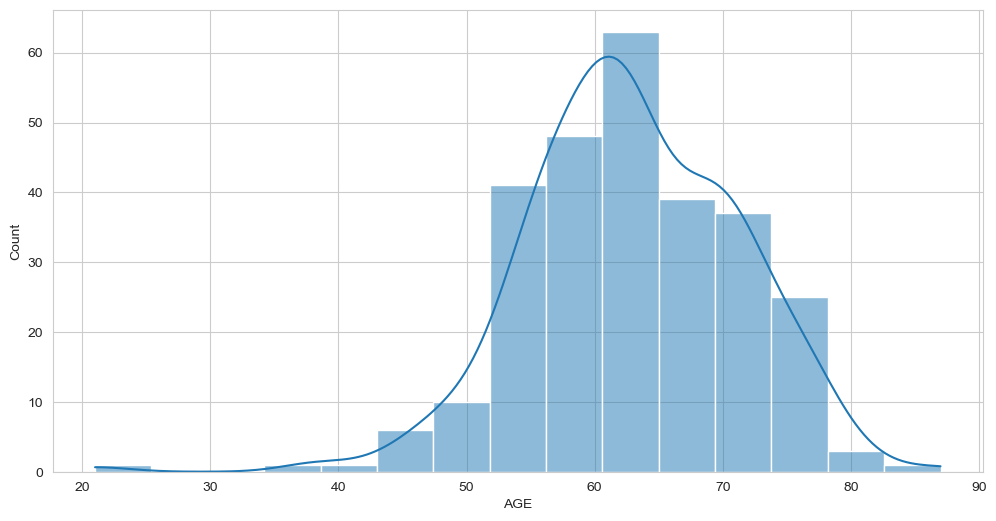

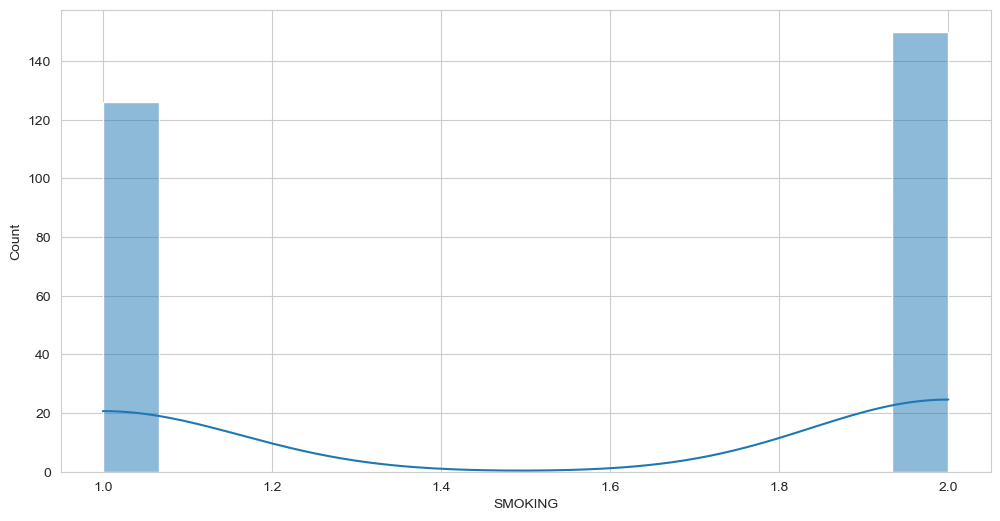

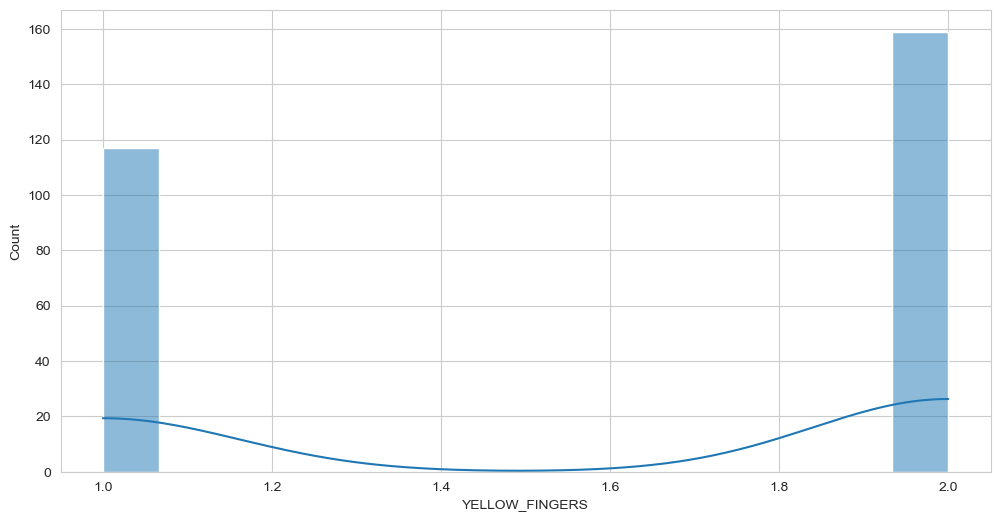

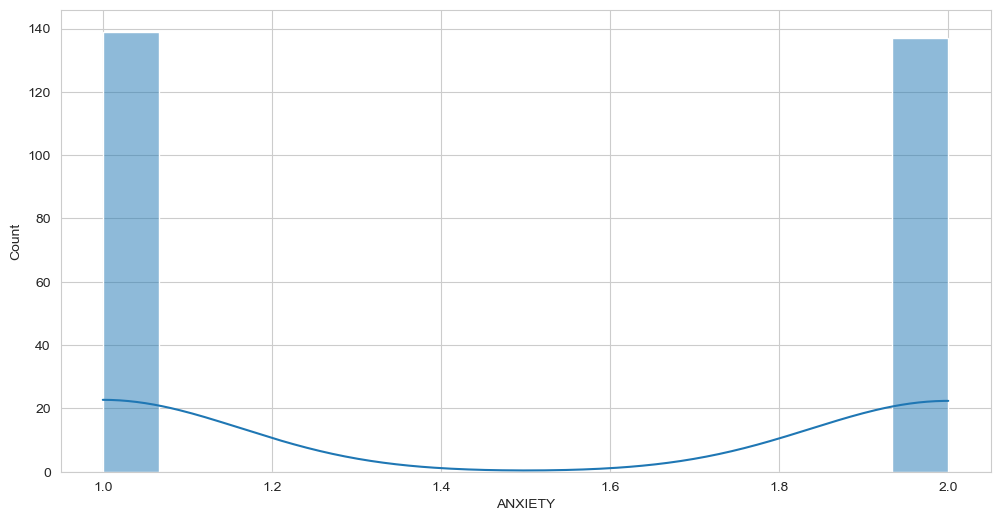

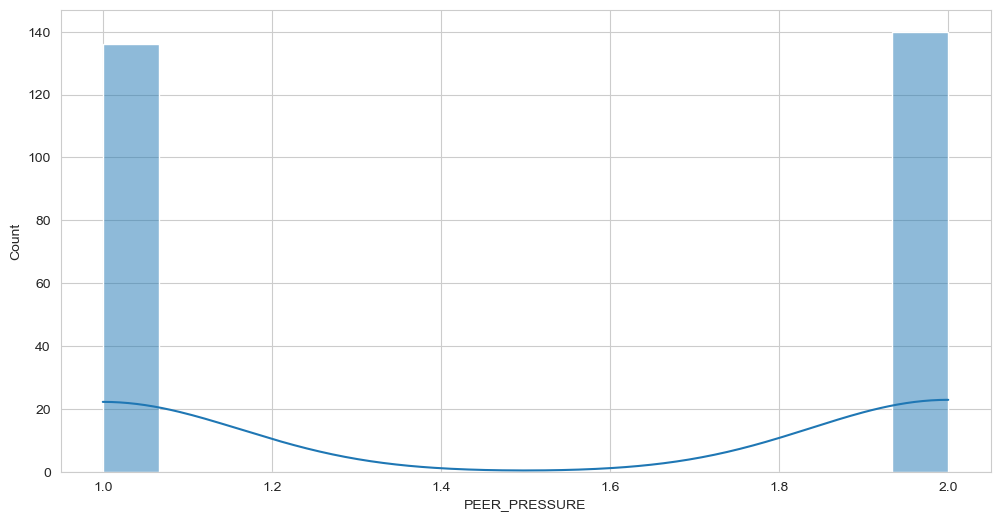

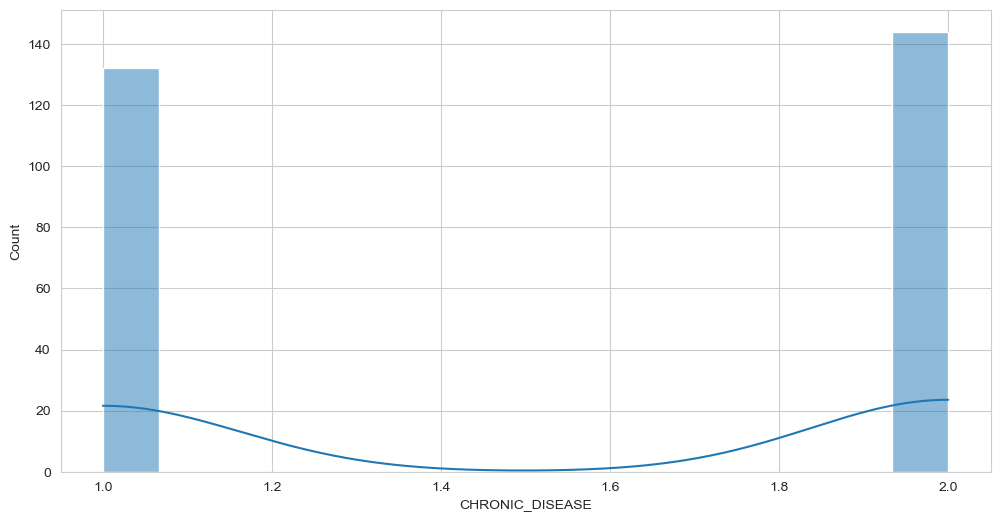

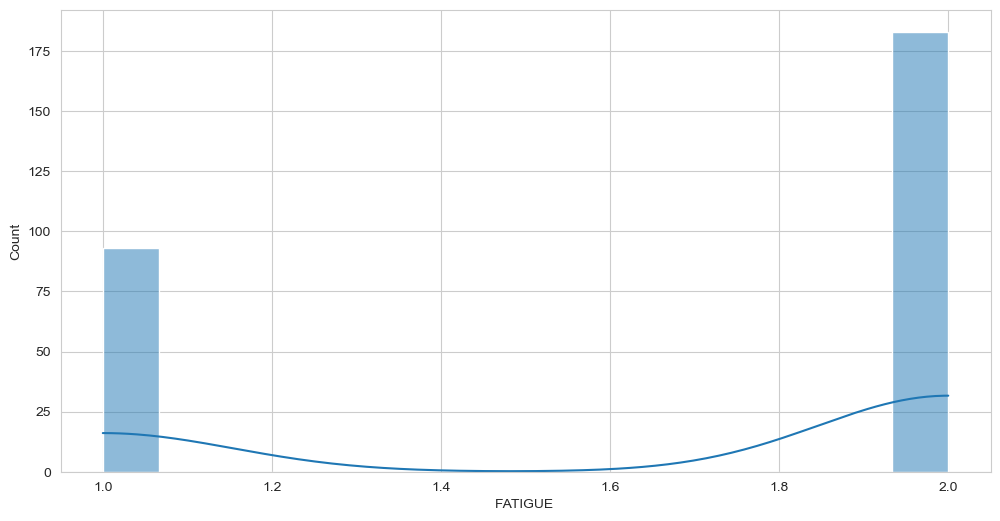

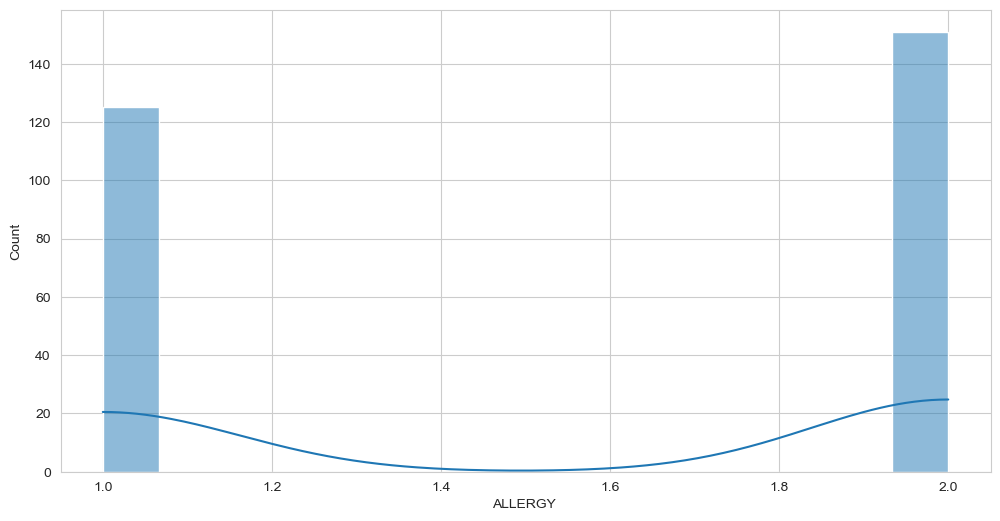

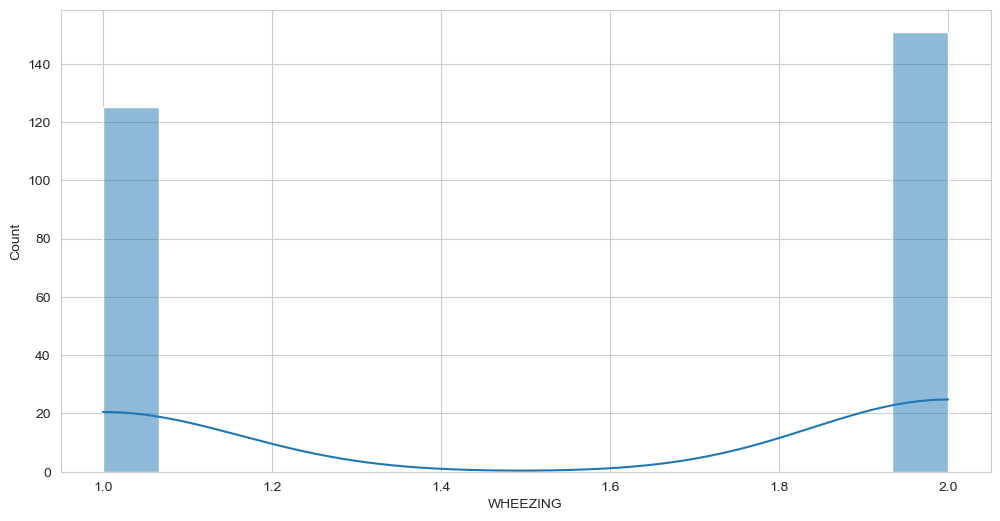

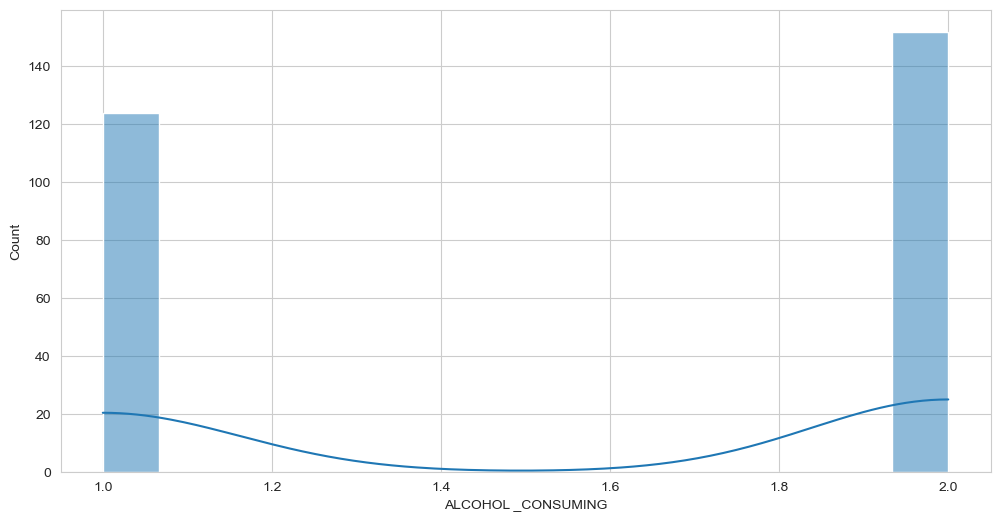

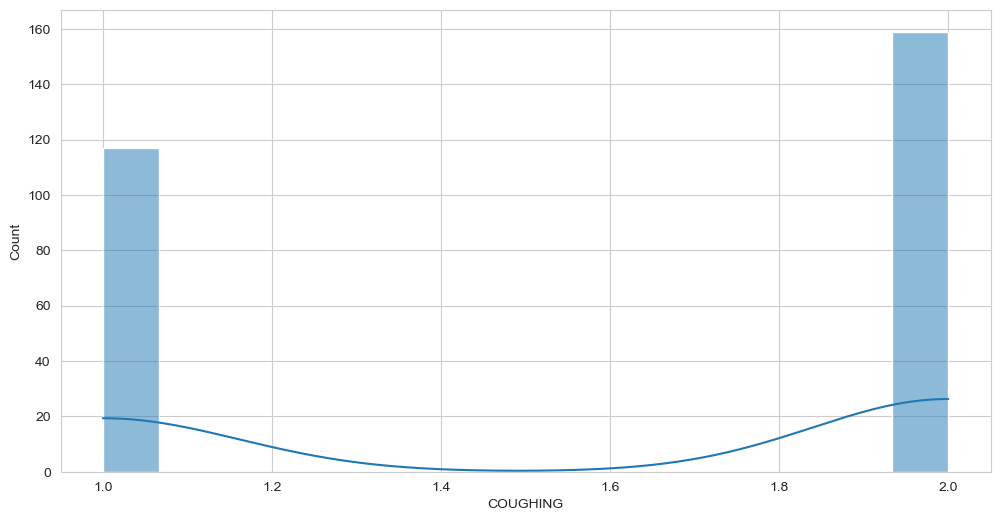

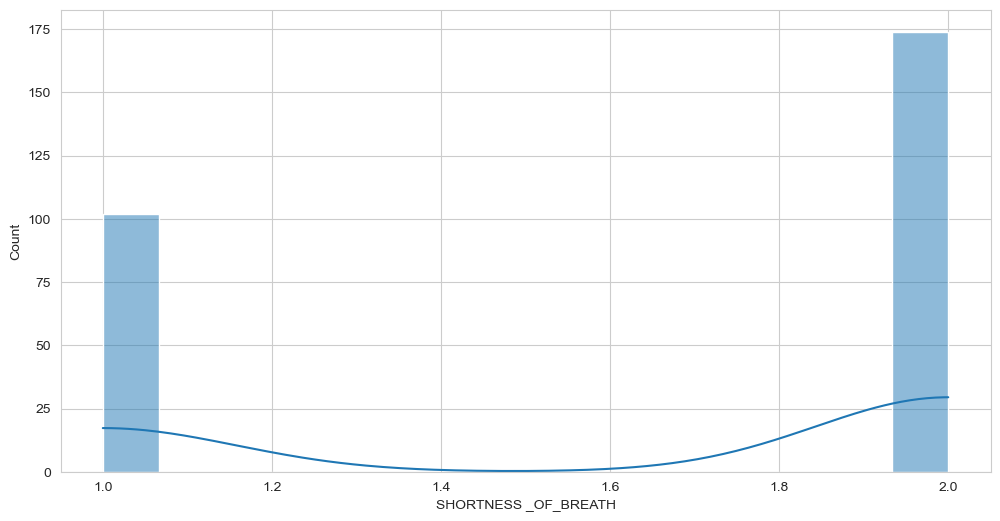

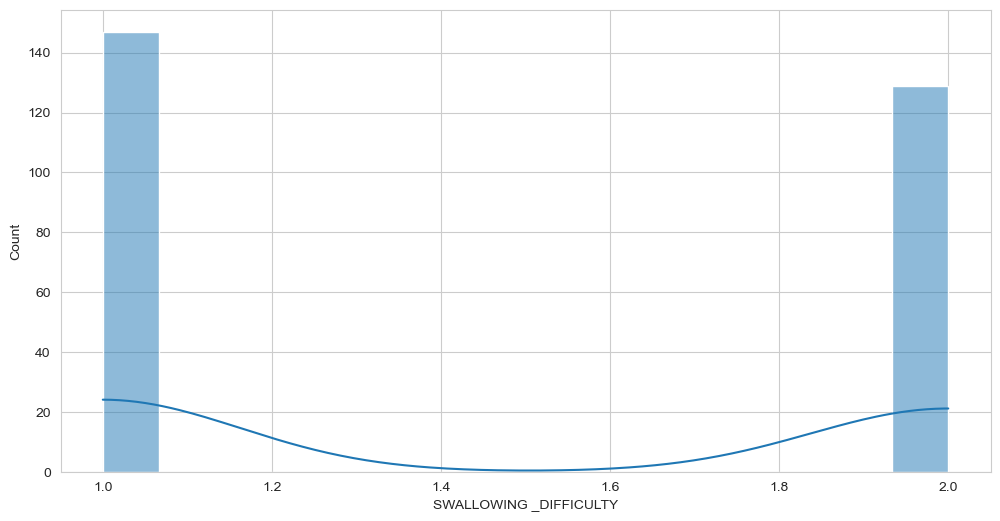

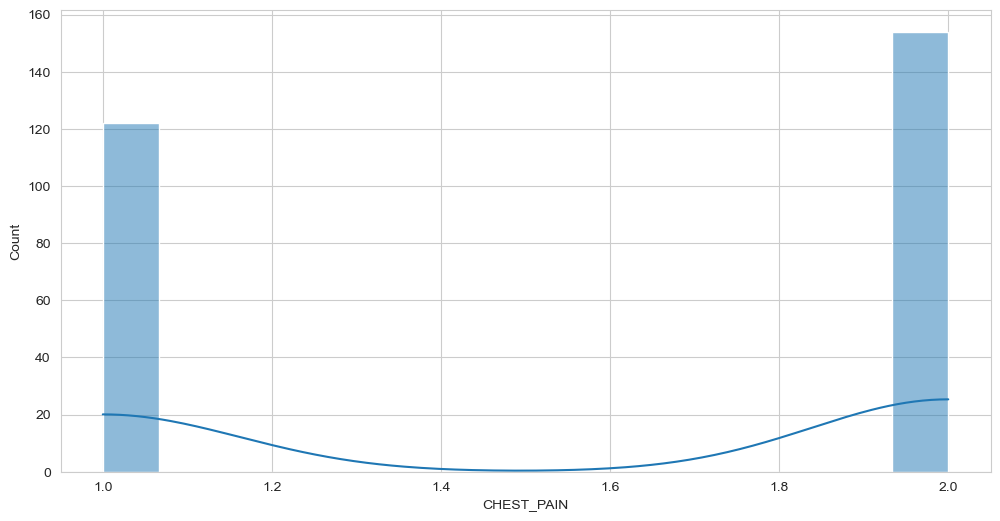

In [345]:
for i in num_col:
    plt.figure(figsize=(12,6))
    # bins=15 划分15个区间
    # kde=True 加趋势曲线
    sns.histplot(data[i],bins=15,kde=True)
    

### 检测异常值【Detecting Outlier】

<AxesSubplot:ylabel='AGE'>

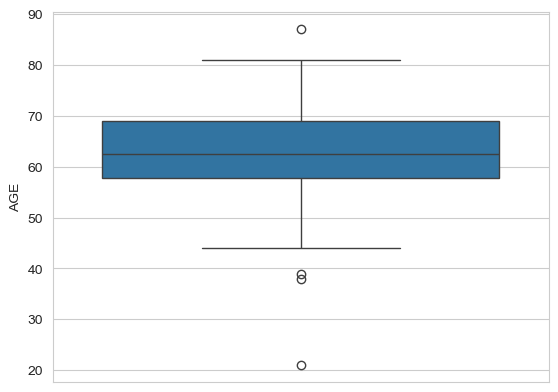

In [346]:
# 由上图可知 年龄的数据不都是在中间区域 有离群值  分类数据就不需要管了
# 箱线图
sns.boxplot(data['AGE'])

In [347]:
# 找下四分位点 和 上四分位点
upper_limit=data['AGE'].quantile(0.75)
lower_limit=data['AGE'].quantile(0.25)
print(upper_limit)
print(lower_limit)

69.0
57.75


In [348]:
new_data=data[(data['AGE']<=69.0)&(data['AGE']>=57.75)]
new_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL _CONSUMING,COUGHING,SHORTNESS _OF_BREATH,SWALLOWING _DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,F,59,1,2,2,2,2,2,2,2,1,2,2,2,1,YES
276,F,62,2,2,2,2,2,2,1,1,1,2,2,1,1,YES
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO


<AxesSubplot:ylabel='AGE'>

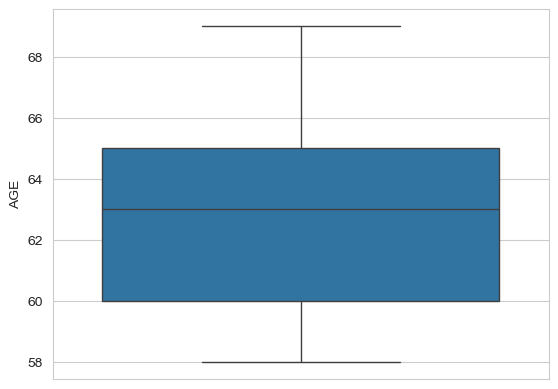

In [349]:
# 去除异常值后 看效果
sns.boxplot(new_data['AGE'])

<AxesSubplot:>

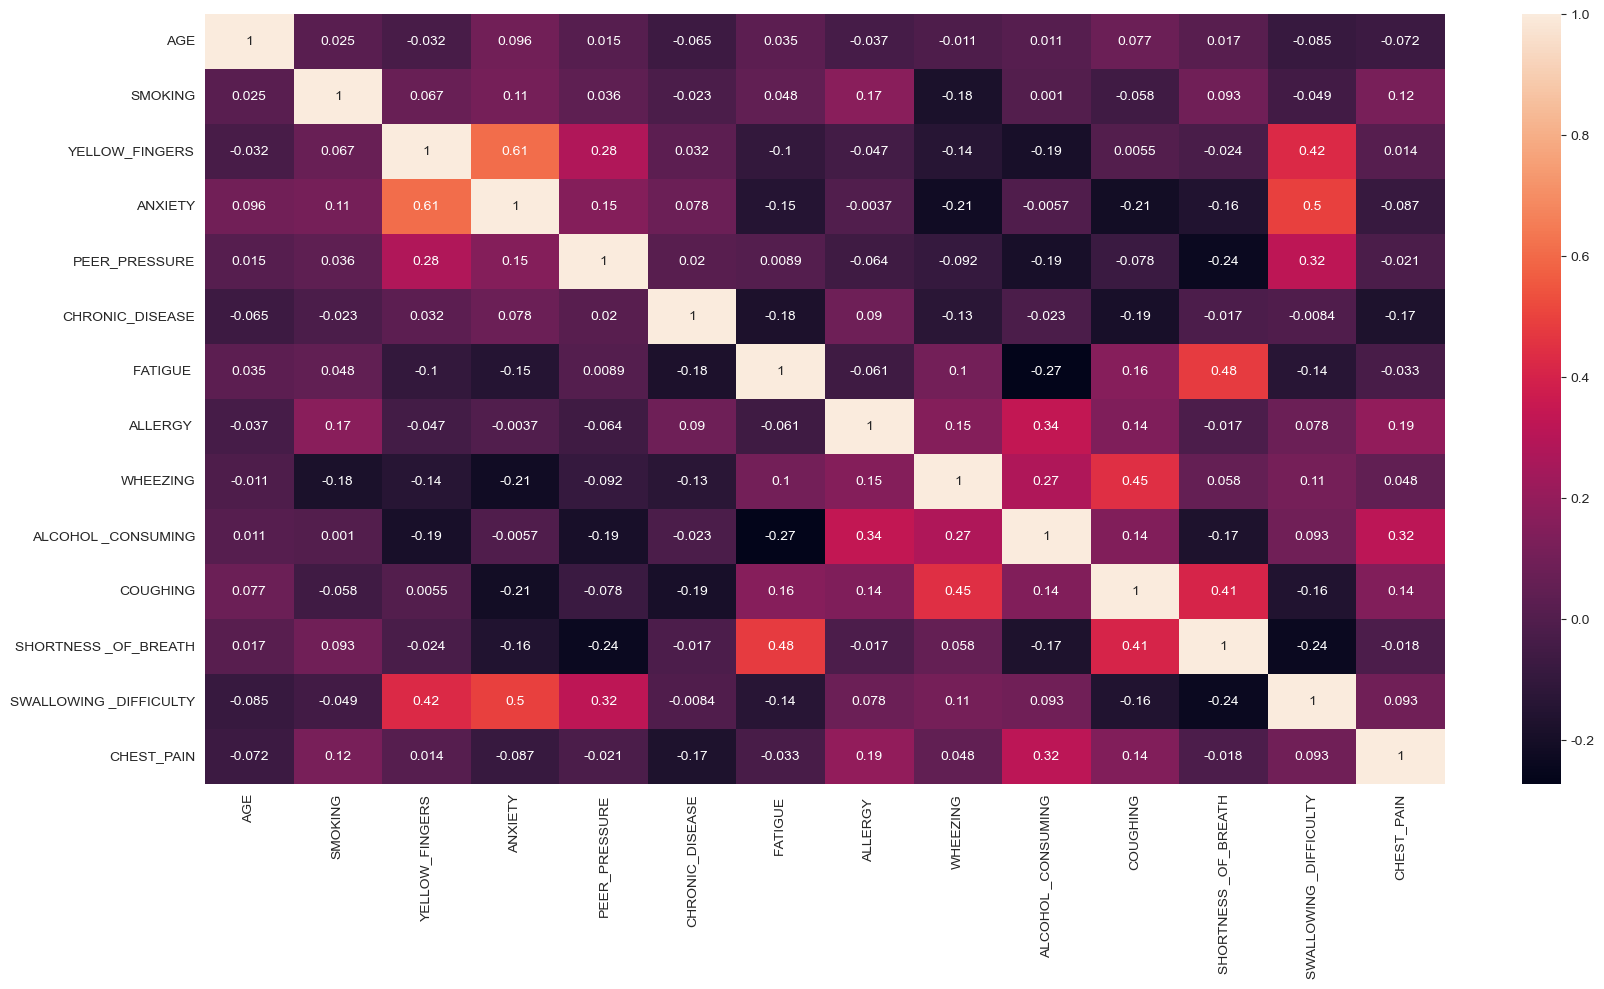

In [350]:
# 重新绘制相关系数热力图
plt.figure(figsize=(20,10))
new_data_num=new_data.drop(['GENDER','LUNG_CANCER'],axis=1)
sns.heatmap(new_data_num.corr(), annot=True)

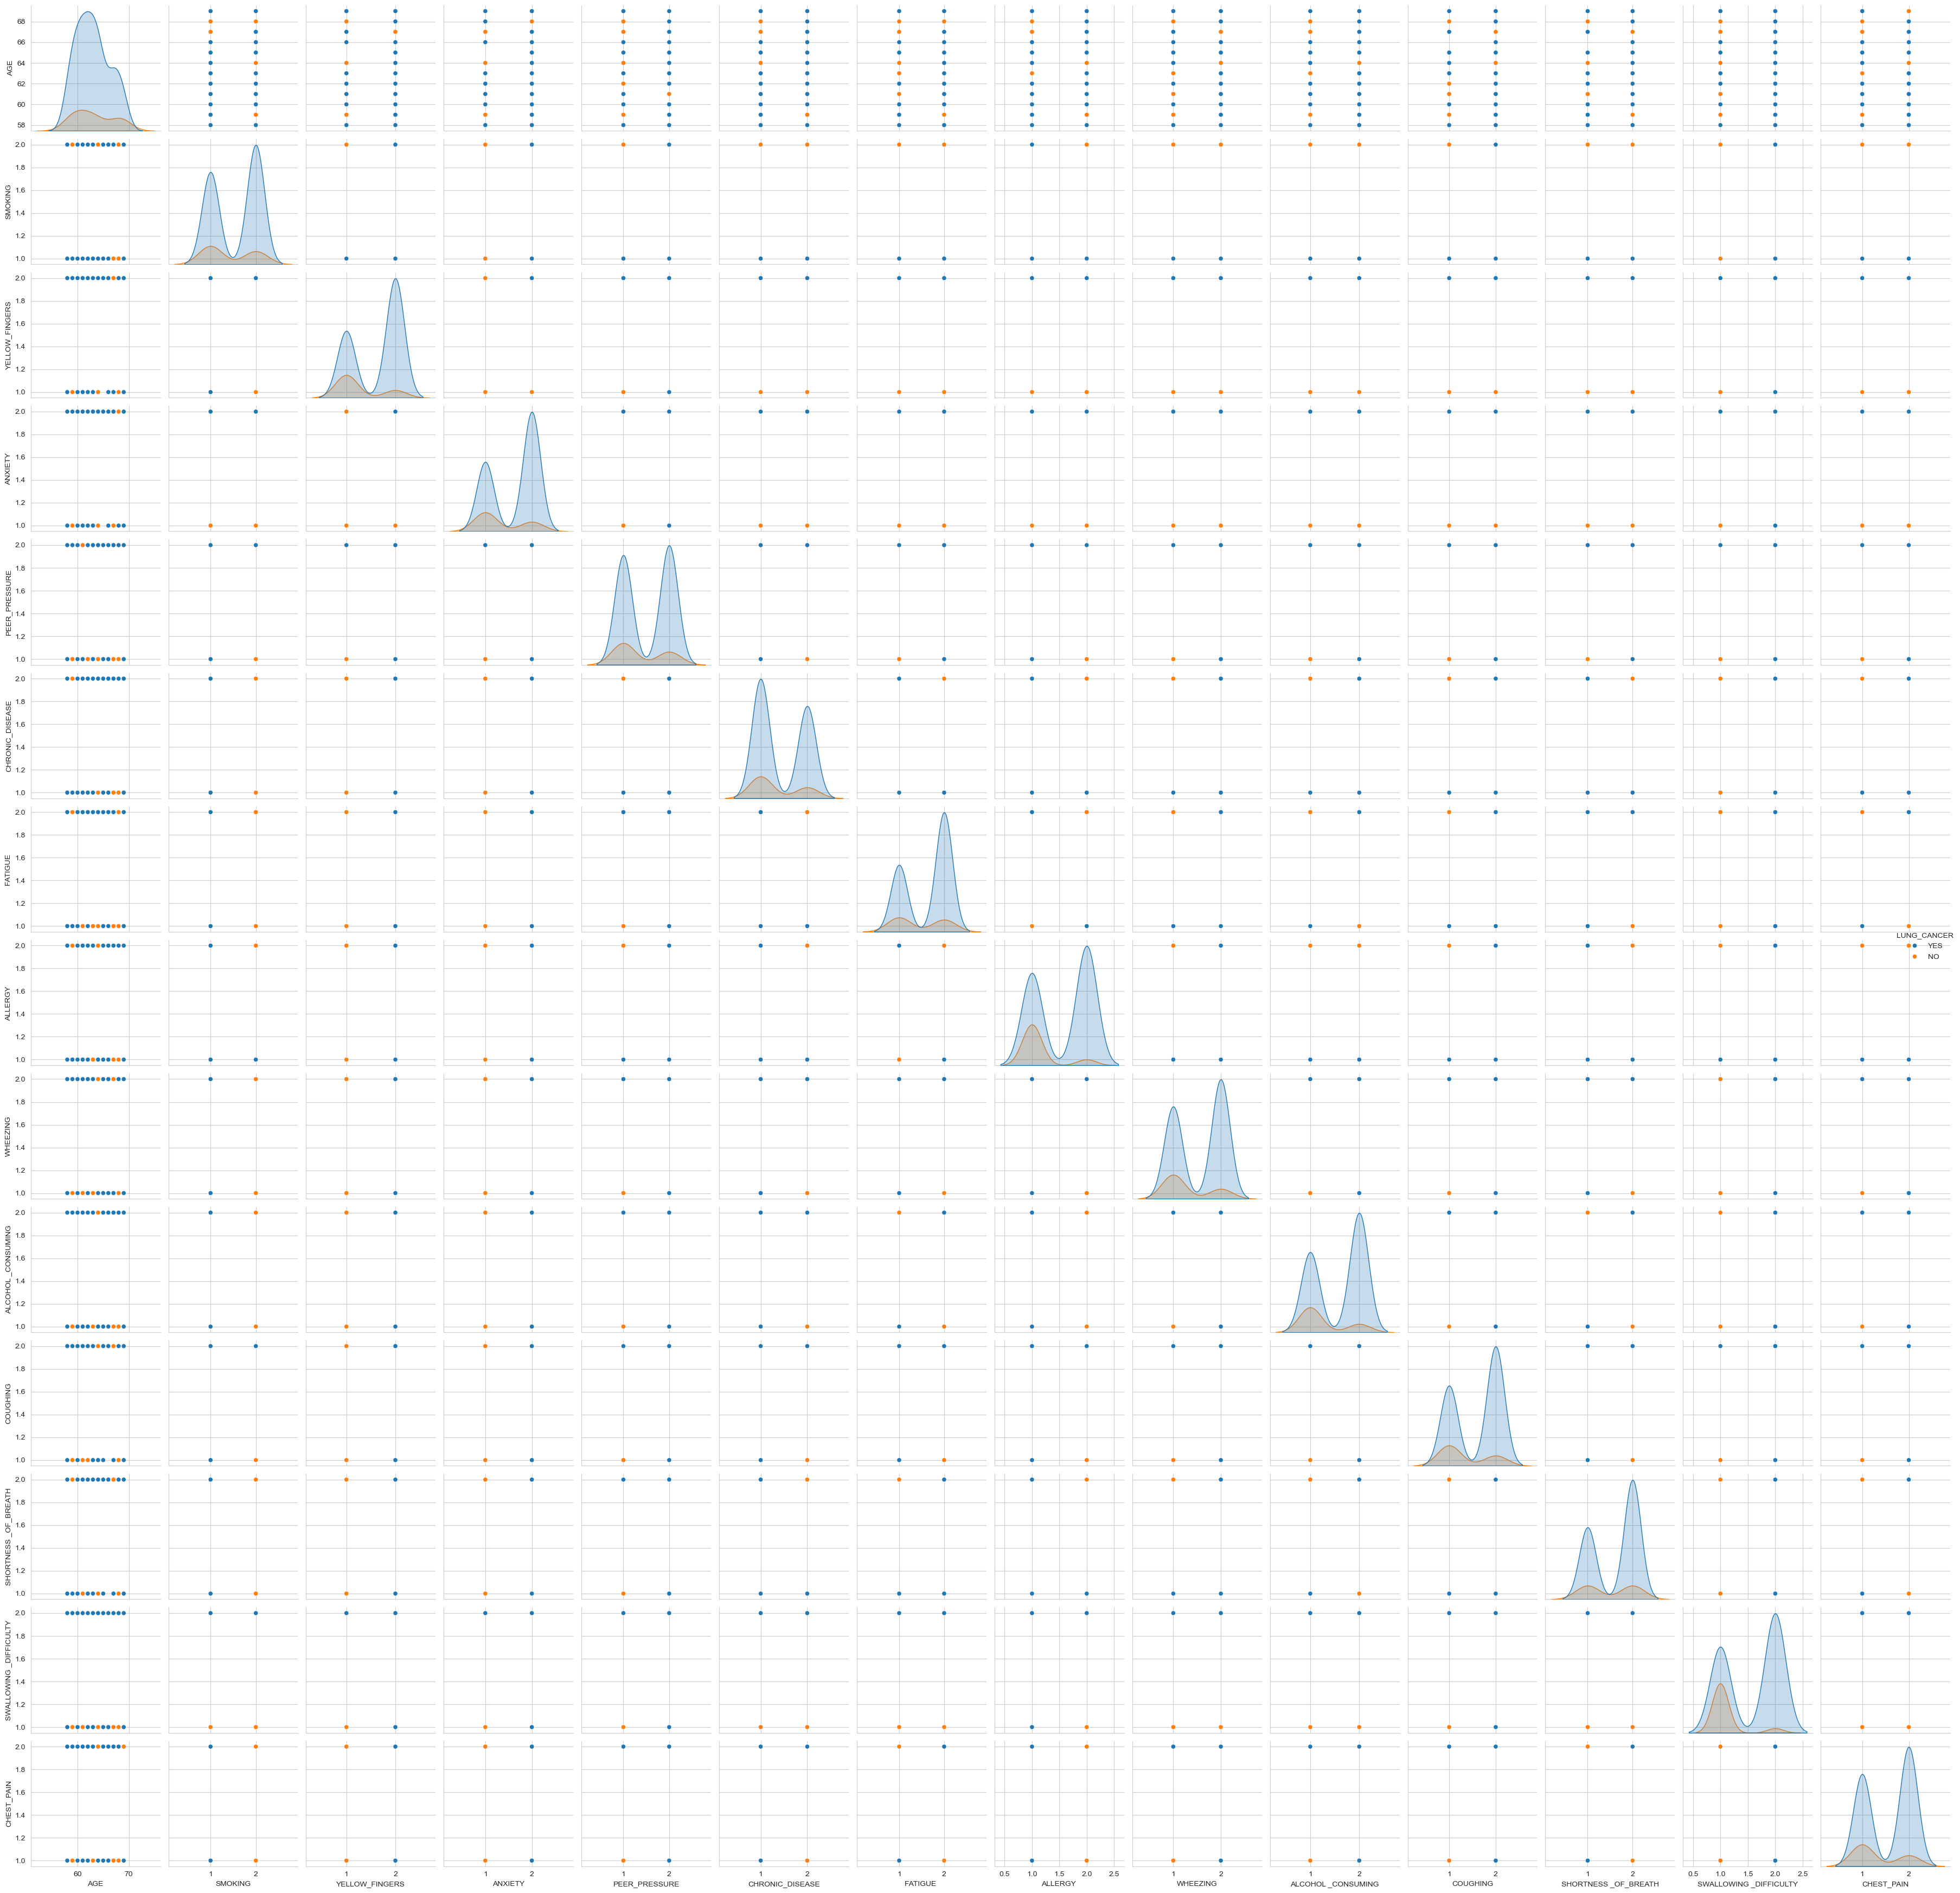

In [351]:
# 查看 Target[LUNG_CANCER] 在变量之间的分布方式
sns.pairplot(new_data,hue='LUNG_CANCER')
plt.tight_layout()
plt.show()

蓝色是1 代表NO 没有此症状

橙色是2 代表YES 有此症状

In [352]:
# 特征编码：将字符型数据 转为 离散型/分类型 数值的数据
#{'LUNG_CANCER':{'No':0,'Yes':1},'GENDER':{'Male':1,'Female':0}}

# 字典编码？
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# 深拷贝
df1=new_data.copy(deep=True)

df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL _CONSUMING,COUGHING,SHORTNESS _OF_BREATH,SWALLOWING _DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,F,59,1,2,2,2,2,2,2,2,1,2,2,2,1,YES
276,F,62,2,2,2,2,2,2,1,1,1,2,2,1,1,YES
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO


In [353]:
GENDER = le.fit_transform(new_data['GENDER'])
LUNG_CANCER=le.fit_transform(new_data['LUNG_CANCER'])
GENDER
LUNG_CANCER
df1['GENDER']=GENDER
df1['LUNG_CANCER']=LUNG_CANCER

In [354]:
df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,...,COUGHING,SHORTNESS _OF_BREATH,SWALLOWING _DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,2,...,2,2,2,2,1
2,0,59,1,1,1,...,2,2,1,2,0
3,1,63,2,2,2,...,1,1,2,2,0
4,0,63,1,2,1,...,2,2,1,1,0
8,0,68,2,1,2,...,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
273,0,59,1,2,2,...,2,2,2,1,1
276,0,62,2,2,2,...,2,2,1,1,1
279,0,59,1,2,2,...,2,1,2,1,1
280,0,59,2,1,1,...,1,2,1,1,0


### 划分训练集和测试集

In [355]:
X = df1.drop(columns=['LUNG_CANCER'],axis=1)
y = df1['LUNG_CANCER']

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
X_train, X_test

(     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 143       0   63        2               2        2              2   
 13        1   58        2               1        1              1   
 105       0   60        1               1        1              1   
 279       0   59        1               2        2              2   
 173       0   69        1               1        2              1   
 ..      ...  ...      ...             ...      ...            ...   
 139       1   63        1               2        1              1   
 265       0   60        2               2        2              2   
 70        1   68        2               2        2              2   
 216       0   67        2               2        2              2   
 280       0   59        2               1        1              1   
 
      CHRONIC_DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL _CONSUMING  \
 143                2         2         2         2                   1   
 13     

标准化: 分类数据也要标准化？？  原作者标准化了 我没有 

In [357]:
# 训练数据和测试数据都要进行标准化
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# X_train,X_test

'''
问题：数据标准化，应该在训练集和测试集划分前还是后？

答：数据标准化，应该在训练集和测试集划分后，分别对训练集和测试集进行数据标准化处理。不应该是数据标准化后，再进行划分。
虽然从模型测试的结果看，可能出现的差距不大。
'''

'\n问题：数据标准化，应该在训练集和测试集划分前还是后？\n\n答：数据标准化，应该在训练集和测试集划分后，分别对训练集和测试集进行数据标准化处理。不应该是数据标准化后，再进行划分。\n虽然从模型测试的结果看，可能出现的差距不大。\n'

### 模型训练--机器学习模型构建与评估

逻辑回归模型

In [358]:
# 构建和评估逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 初始化逻辑回归模型
lr = LogisticRegression()
# 训练模型
lr.fit(X_train, y_train)
# 进行预测
lr_pred = lr.predict(X_test)
# 计算混淆矩阵
lr_conf = confusion_matrix(y_test, lr_pred)
# 生成分类报告
lr_report = classification_report(y_test, lr_pred)
# 计算准确率
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)


# 输出结果
print(f"混淆矩阵: \n\n{lr_conf}")
print(f"\n分类报告 : \n\n{lr_report}")
print(f"\n逻辑回归的准确率为： {lr_acc} %")


c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision an

混淆矩阵: 

[[ 0  2]
 [ 0 27]]

分类报告 : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      1.00      0.96        27

    accuracy                           0.93        29
   macro avg       0.47      0.50      0.48        29
weighted avg       0.87      0.93      0.90        29


逻辑回归的准确率为： 93.1 %


### 模型训练--机器学习模型构建与评估

高斯朴素贝叶斯模型

In [359]:
# 构建和评估高斯朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB

# 初始化高斯朴素贝叶斯模型
gnb = GaussianNB()
# 训练模型
gnb.fit(X_train, y_train)
# 进行预测
gnb_pred = gnb.predict(X_test)
# 计算混淆矩阵
gnb_conf = confusion_matrix(y_test, gnb_pred)
# 生成分类报告
gnb_report = classification_report(y_test, gnb_pred)
# 计算准确率
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
# 输出结果
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 2  0]
 [ 2 25]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.93      0.96        27

    accuracy                           0.93        29
   macro avg       0.75      0.96      0.81        29
weighted avg       0.97      0.93      0.94        29


The Accuracy of Gaussian Naive Bayes is 93.1 %


### 模型训练--机器学习模型构建与评估

伯努利朴素贝叶斯模型

In [360]:
# 构建和评估伯努利朴素贝叶斯模型
from sklearn.naive_bayes import BernoulliNB

# 初始化伯努利朴素贝叶斯模型
bnb = BernoulliNB()
# 训练模型
bnb.fit(X_train, y_train)
# 进行预测
bnb_pred = bnb.predict(X_test)
# 计算混淆矩阵
bnb_conf = confusion_matrix(y_test, bnb_pred)
# 生成分类报告
bnb_report = classification_report(y_test, bnb_pred)
# 计算准确率
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
# 输出结果
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 

[[ 0  2]
 [ 0 27]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      1.00      0.96        27

    accuracy                           0.93        29
   macro avg       0.47      0.50      0.48        29
weighted avg       0.87      0.93      0.90        29


The Accuracy of Bernoulli Naive Bayes is 93.1 %


c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 模型训练--机器学习模型构建与评估

SVM 支持向量机

In [361]:
from sklearn.svm import SVC
svc=SVC(random_state=0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

from sklearn.metrics import accuracy_score
svc_acc=accuracy_score(y_test,y_pred)

In [362]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
# C： 参数尽可能完美分类的 容忍度
# kernel：核函数 ：数据由低维变为高维的坐标转换方式


# 要是不想让 GridSearchCV 输出详细的日志信息，可以把 verbose 参数的值调小或者设为 0。
# n_jobs	同时工作的cpu个数（-1代表全部）	[-1,1,2…]
# cv=5  交叉验证参数，默认None，使用五折交叉验证。指定fold数量，默认为5(之前版本为3)，也可以是yield训练/测试数据的生成器。
grid= GridSearchCV(SVC(),param_grid, verbose=3,cv=5, n_jobs=1)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.783 total time=   0.1s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.783 total time=   0.0s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.783 total time=   0.0s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.818 total time=   0.0s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.818 total time=   0.0s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.818 total time=   0.0s
[CV 1/5] END ...C=0.1, degree=1, kernel=sigmoid;, score=0.783 total time=   0.0s
[CV 2/5] END ...C=0.1, degree=1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [363]:
grid.best_score_
print(grid.best_params_)

{'C': 1000, 'degree': 2, 'kernel': 'poly'}


In [364]:
# 网格搜索最优参数之后 再次训练SVM ？？？ 
# 为什么不是这样 ？？？？？？？
svc =SVC(C=1000, gamma=1,degree = 2,kernel = 'poly',probability=True)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
ac_svc = accuracy_score(y_test,y_pred)
ac_svc

0.896551724137931

In [365]:
svc =SVC(C=1, gamma=1,degree = 5,kernel = 'linear',probability=True)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
ac_svc = accuracy_score(y_test,y_pred)
ac_svc

0.9655172413793104

In [366]:
# 加入5折 交叉验证 在训练好的模型继续训练
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv =5)
# scores 默认是：（准确率）
scores # 每一次交叉验证的结果/准确率

# 取平均值
ac_svc = np.mean(scores)
ac_svc

0.8935960591133005

###  模型评估

混淆矩阵

In [367]:
from sklearn.metrics import confusion_matrix

In [368]:
y_pred_svc = svc.predict(X_test)
ac_svc = accuracy_score(y_test,y_pred)
cf_matrix = confusion_matrix(y_test, y_pred_svc)
cf_matrix


array([[ 2,  0],
       [ 1, 26]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for SVM')

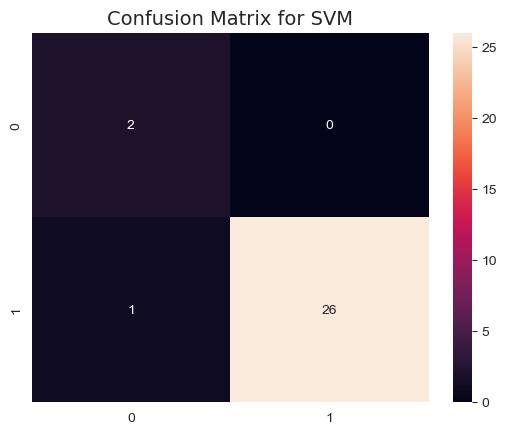

In [369]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM", fontsize=14, fontname="DejaVu Sans", y=1.0)

 precision    recall  f1-score   support  accuracy

In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.96      0.98        27

    accuracy                           0.97        29
   macro avg       0.83      0.98      0.89        29
weighted avg       0.98      0.97      0.97        29



### 模型训练--机器学习模型构建与评估

随机森林模型

In [371]:
# 构建和评估 随机森林模型
from sklearn.ensemble import RandomForestClassifier

# 初始化随机森林模型，设置树的数量和随机种子
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
# 训练模型
rfg.fit(X_train, y_train)
# 进行预测
rfg_pred = rfg.predict(X_test)
# 计算混淆矩阵
rfg_conf = confusion_matrix(y_test, rfg_pred)
# 生成分类报告
rfg_report = classification_report(y_test, rfg_pred)
# 计算准确率
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
# 输出结果
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 2  0]
 [ 1 26]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.96      0.98        27

    accuracy                           0.97        29
   macro avg       0.83      0.98      0.89        29
weighted avg       0.98      0.97      0.97        29


The Accuracy of Random Forest Classifier is 96.55 %


### 模型训练--机器学习模型构建与评估

K近邻(已知target 分类问题)

In [372]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier1.fit(X_train,y_train)

y_pred =  classifier1.predict(X_test)
ac_svc = accuracy_score(y_test,y_pred)
ac_svc

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      1.00      0.96        27

    accuracy                           0.93        29
   macro avg       0.47      0.50      0.48        29
weighted avg       0.87      0.93      0.90        29



c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\李亚群\appdata\roaming\python\python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [373]:
# 继续网格搜索最好的参数

from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 3, cv=3, n_jobs = 1)
gs.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.789 total time=   0.1s
[CV 2/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.730 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.757 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.789 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.784 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.757 total time=   0.1s
[CV 1/3] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.763 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.784 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.865 total time=   0.1s
[CV 1/3] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.763 tot

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [374]:
gs.best_score_

0.8309625414888573

In [375]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [376]:
# # 使用最好的超参数
from sklearn import metrics
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn_pred))

Test set accuracy:  0.896551724137931


Text(0.5, 1.03, 'Confusion Matrix for KNN')

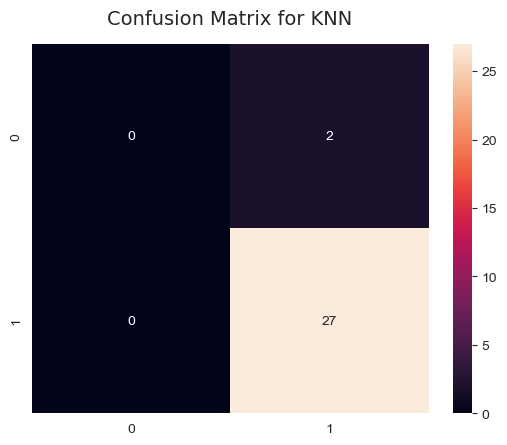

In [377]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for KNN", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [378]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)
ac_knn = np.mean(scores)
print('Model accuracy: ',ac_knn)

Model accuracy:  0.8438423645320196


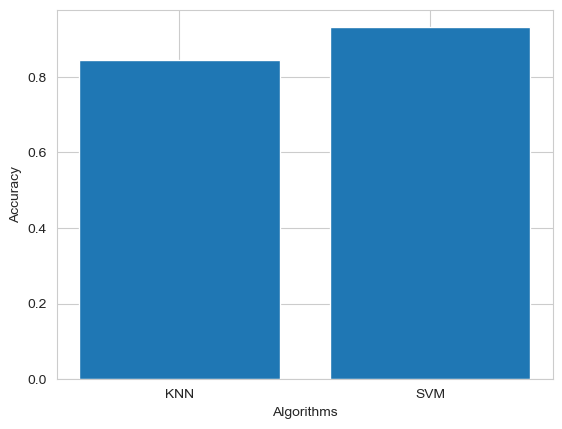

In [379]:
plt.bar(['KNN','SVM'],[ac_knn,ac_svc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

### 模型训练--机器学习模型构建与评估

XGBoost模型

In [380]:
# 构建和评估XGBoost模型
from xgboost import XGBClassifier

# 初始化XGBoost模型
xgb = XGBClassifier(use_label_encoder = False)
# 训练模型
xgb.fit(X_train, y_train)
# 进行预测
xgb_pred = xgb.predict(X_test)
# 计算混淆矩阵
xgb_conf = confusion_matrix(y_test, xgb_pred)
# 生成分类报告
xgb_report = classification_report(y_test, xgb_pred)
# 计算准确率
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
# 输出结果
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

c:\users\李亚群\appdata\roaming\python\python310\site-packages\xgboost\training.py:183: UserWarning: [17:37:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix : 

[[ 2  0]
 [ 2 25]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.93      0.96        27

    accuracy                           0.93        29
   macro avg       0.75      0.96      0.81        29
weighted avg       0.97      0.93      0.94        29


The Accuracy of Extreme Gradient Boosting Classifier is 93.1 %


实现并评估了七种不同的机器学习模型：

- 逻辑回归
- 高斯朴素贝叶斯
- 伯努利朴素贝叶斯
- 支持向量机
- 随机森林
- K最近邻
- XGBoost
-  
每个模型都计算了混淆矩阵、分类报告和准确率，便于比较各个模型的性能。

### 模型性能对比与可视化


In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个字典来存储所有模型的准确率
accuracy_scores = {
    'Logistic Regression': lr_acc,
    'Gaussian Naive Bayes': gnb_acc,
    'Bernoulli Naive Bayes': bnb_acc,
    'Support Vector Machine': svc_acc,
    'Random Forest': rfg_acc,
    'K-Nearest Neighbors': ac_svc,
    'XGBoost': xgb_acc
}


# 创建一个包含更多性能指标的DataFrame
from sklearn.metrics import precision_score, recall_score, f1_score

model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 
              'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost'],
    'Accuracy': [lr_acc, gnb_acc, bnb_acc, svc_acc*100, rfg_acc, ac_svc*100, xgb_acc],
    'Precision': [precision_score(y_test, lr_pred), precision_score(y_test, gnb_pred),
                  precision_score(y_test, bnb_pred), precision_score(y_test, y_pred),
                  precision_score(y_test, rfg_pred), precision_score(y_test, y_knn_pred),
                  precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, lr_pred), recall_score(y_test, gnb_pred),
               recall_score(y_test, bnb_pred), recall_score(y_test, y_pred),
               recall_score(y_test, rfg_pred), recall_score(y_test, y_knn_pred),
               recall_score(y_test, xgb_pred)],
    'F1 Score': [f1_score(y_test, lr_pred), f1_score(y_test, gnb_pred),
                f1_score(y_test, bnb_pred), f1_score(y_test, y_pred),
                f1_score(y_test, rfg_pred), f1_score(y_test, y_knn_pred),
                f1_score(y_test, xgb_pred)]
})

# 按准确率降序排序
model_metrics = model_metrics.sort_values('Accuracy', ascending=False)

model_metrics


,Model,Accuracy,Precision,Recall,F1 Score
4,Random Forest,96.550000,1.000000,0.962963,0.981132
3,Support Vector Machine,93.103448,0.931034,1.000000,0.964286
5,K-Nearest Neighbors,93.103448,0.928571,0.962963,0.945455
0,Logistic Regression,93.100000,0.931034,1.000000,0.964286
1,Gaussian Naive Bayes,93.100000,1.000000,0.925926,0.961538
2,Bernoulli Naive Bayes,93.100000,0.931034,1.000000,0.964286
6,XGBoost,93.100000,1.000000,0.925926,0.961538


准确率柱状图

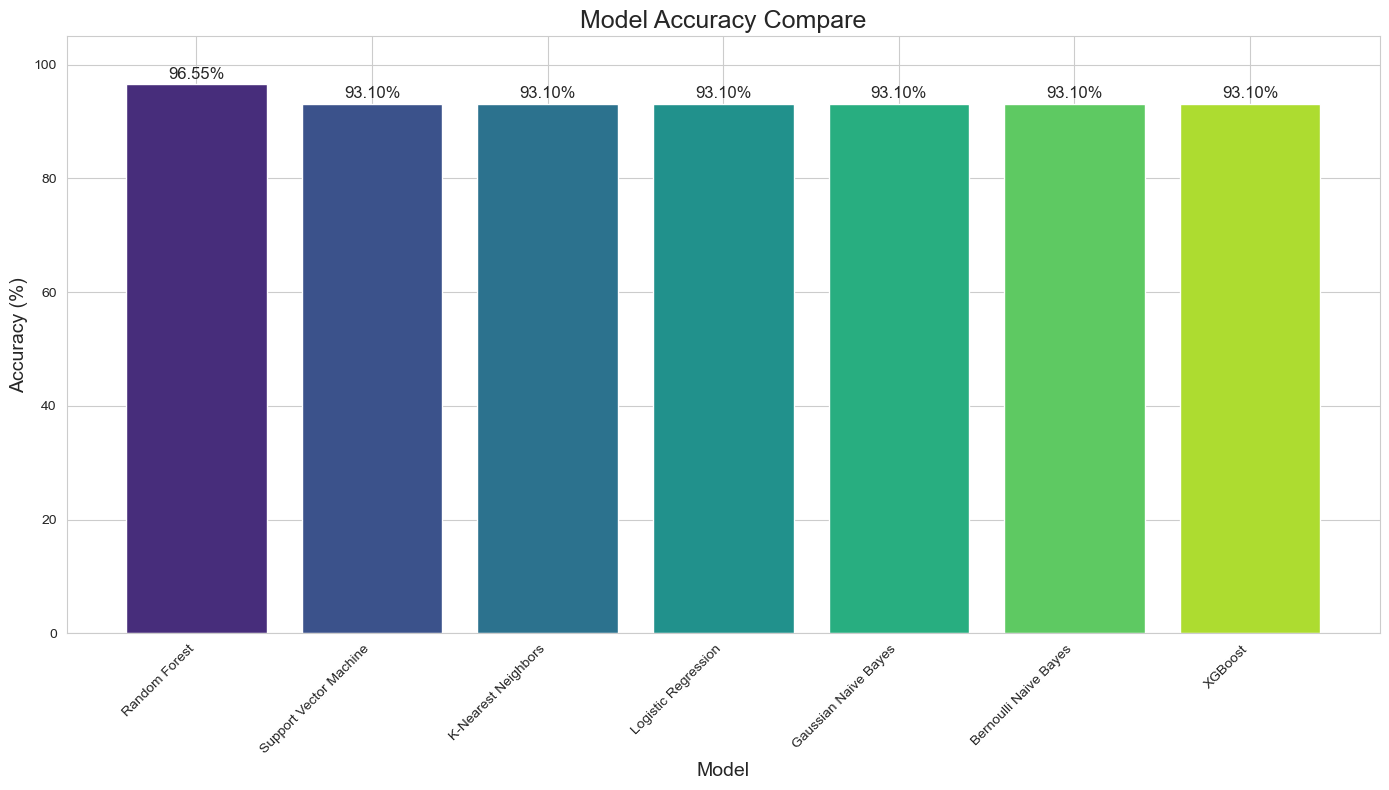

In [382]:
# 创建模型准确率柱状图
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
bar_colors = sns.color_palette("viridis", len(model_metrics))

# 创建柱状图
bars = plt.bar(model_metrics['Model'], model_metrics['Accuracy'], color=bar_colors)

# 在每个柱子上添加准确率值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

plt.title('Model Accuracy Compare', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)  # 设置y轴范围，留出空间显示标签
plt.tight_layout()
plt.show()


模型性能雷达图

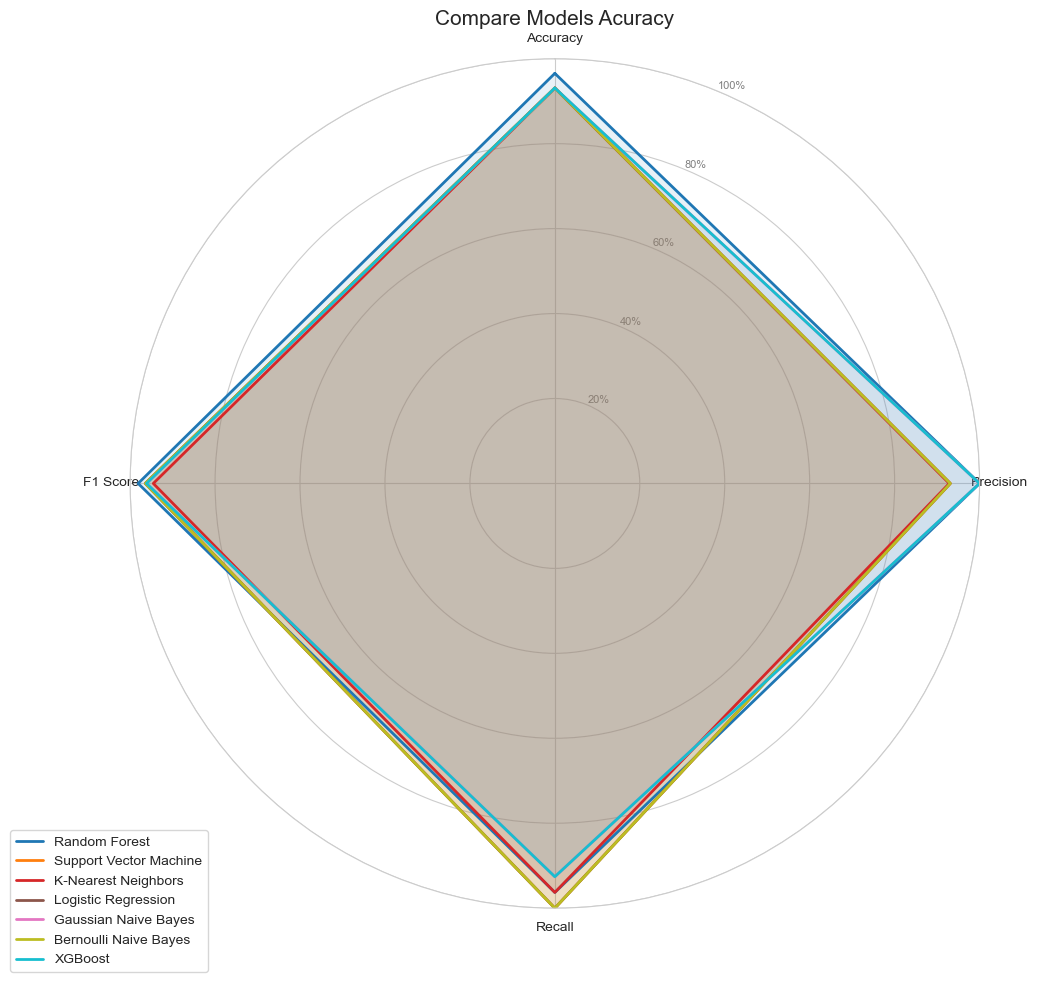

In [383]:
from math import pi

# 准备雷达图数据
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
N = len(categories)

# 计算每个类别的角度
angles = [n / float(N) * 2 * pi  for n in range(N)]
angles += angles[:1]  # 闭合雷达图

plt.figure(figsize=(12, 10))
ax = plt.subplot(111, polar=True)

# 为每个模型绘制雷达图
colors = plt.cm.tab10(np.linspace(0, 1, len(model_metrics)))
for i, (_, row) in enumerate(model_metrics.iterrows()):
    values = row.iloc[1:].tolist()  # 跳过模型名称列
    values = [v if not isinstance(v, str) else float(v.strip('%')) for v in values]  # 确保值是数字
    values = [v/100 if v > 1 else v for v in values]  # 将百分比转换为0-1范围
    values += values[:1]  # 闭合雷达图
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Model'], color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# 设置雷达图属性
ax.set_theta_offset(pi / 2)  # 从顶部开始
ax.set_theta_direction(-1)  # 顺时针方向

# 设置x轴（雷达图的圆周）
plt.xticks(angles[:-1], categories)

# 设置y轴
ax.set_ylim(0, 1)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['20%', '40%', '60%', '80%', '100%'], color='grey', size=8)

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Compare Models Acuracy', size=15)
plt.tight_layout()
plt.show()

模型性能热图 (感觉没多大意义)

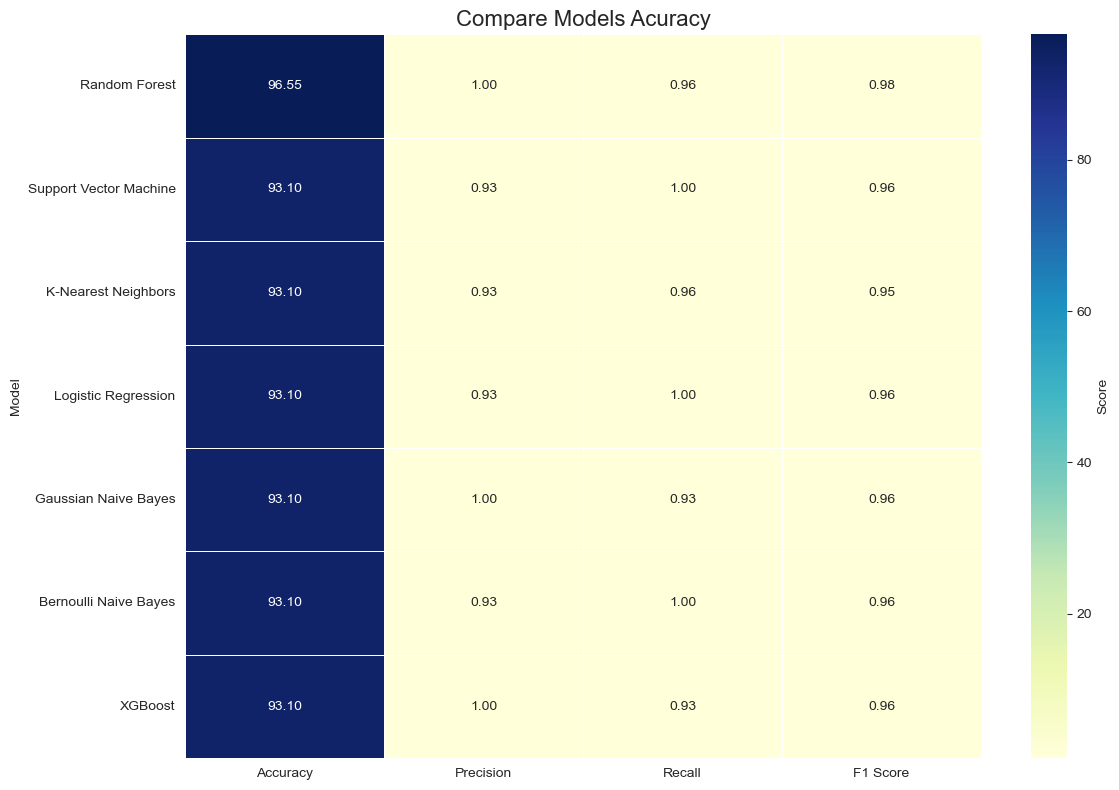

In [384]:
plt.figure(figsize=(12, 8))

# 转置数据框以便热图显示
metrics_heatmap = model_metrics.set_index('Model')
metrics_heatmap = metrics_heatmap.reindex(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 创建热图
sns.heatmap(metrics_heatmap, annot=True, cmap='YlGnBu', fmt='.2f', 
            linewidths=0.5, cbar_kws={'label': 'Score'})

# 模型性能指标热图比较
plt.title('Compare Models Acuracy', fontsize=16)
plt.tight_layout()
plt.show()

模型性能总结分析

In [385]:
def compare_models_summary(metrics_df):
    """
    输出各性能指标的最佳模型
    """
    best_models = {}
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
        best_model = metrics_df.loc[metrics_df[metric].idxmax()]
        best_models[metric] = (best_model['Model'], best_model[metric])
    
    print("各指标的最佳模型:")
    for metric, (model, score) in best_models.items():
        print(f"- {metric}: {model} ({score:.2f})")
    
    # 找出综合表现最好的模型（求均值）
    metrics_df['Average'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1)
    best_overall = metrics_df.loc[metrics_df['Average'].idxmax()]
    print(f"\n综合表现最佳的模型: {best_overall['Model']} (平均分: {best_overall['Average']:.2f})")

# 调用函数
compare_models_summary(model_metrics)

各指标的最佳模型:
- Accuracy: Random Forest (96.55)
- Precision: Random Forest (1.00)
- Recall: Support Vector Machine (1.00)
- F1 Score: Random Forest (0.98)

综合表现最佳的模型: Random Forest (平均分: 24.87)
